# Predictions of Chronic Kidney Disease

## Abstract
Chronic Kidney Disease (CKD) is a common illness that often goes undetected before medical intervention has started, early detection is a critical component for patient outcome/longevity, this would consist of one or more of the following: prescription medication, dialysis or a kidney transplant, and a change in lifestyle factors. As the symptoms of CKD can be quite broad, variable and minor (to start with), people do not often approach the doctors or other medical practitioners early enough. It is startling to consider that people can lose up to 90% of their kidney function before they start to display symptoms, and by that time they could be in end stage renal failure (ESRF) which is fatal without a dialysis or transplant (dialysis may only delay it). In this work we are going to analyze if we can predict CKD or not using Data Science methods. Also, try to figure out early predictions before doing dialysis in CKD patients. If we can achieve these two results, we will be able to give nephrologists a gap time to research the causes of the disease, depending on each patient. In addition, the doctor could give the patient some advice to attempt to minimize the disease and extend the time before having to undergo dialysis or even a kidney transplant. In this particular assignment, we have only 400 patient data. Hence, we have to manage every data carefully. It means that when we clean some data, it will be important to take into account the original data, depending on the case. Our main null hypothesis is whether we can predict CKD without blood creatinine values. Moreover, we are going to find out what features of laboratory results are relevant to be considered a CKD. Additionally, considering the patient ages of data as a timeline of a CKD, we will estimate the time to be exposed to a dialysis. For these, we are going to explore the data, clean and figure out data models to achieve our objectives. 

## Introduction
*Did you know that if you use to be fatigued and have weaknesses periodically, you could have a hidden disease like Chronic Kidney Disease?* This kind of illness is undetected by patients because people think that they are tired considering they have worked so hard. Hence, think "just, I need to rest a little". When you spend a long time in the same conditions... **Bum!** It's too late to try to avoid it. You have to do dialysis and/or a kidney transplant.<br />
In this work we are going to try to create a CKD predictor working on a particular database. Also, we are going to figure out if the patient would have to do dialysis and/or a kidney transplant.

Chronic Kidney Disease (CKD) is a long-term condition where the kidneys progressively lose their ability to function properly over time. The primary function of the kidneys is to filter waste and excess fluids from the blood, which are then excreted as urine. When the kidneys are damaged or impaired, waste products can build up in the body, leading to various complications.<br />
<br />
Causes of Chronic Kidney Disease:

+ Diabetes: High blood sugar levels can damage the blood vessels in the kidneys.
+ Hypertension (High Blood Pressure): Prolonged high blood pressure puts a strain on the kidneys, leading to damage over time.
+ Glomerulonephritis: Inflammation of the kidney's filtering units (glomeruli).
+ Polycystic Kidney Disease: A genetic disorder where cysts form in the kidneys, leading to kidney enlargement and impaired function.
+ Kidney infections or urinary tract obstructions.
<br />

Symptoms of Chronic Kidney Disease:<br />
In the early stages, CKD may not present noticeable symptoms. As the disease progresses, the following symptoms may develop:

+ Fatigue and weakness
+ Swelling (edema) in the ankles, feet, or hands
+ Shortness of breath
+ Increased or decreased urination
+ Blood in the urine
+ Foamy or bubbly urine
+ Nausea and vomiting
+ Loss of appetite
+ Sleep disturbances
+ Muscle cramps
<br />

Treatment and Management:
+ Treatment for CKD aims to slow down the progression of the disease, manage symptoms, and reduce the risk of complications. Depending on the stage of CKD and its underlying cause, management may involve:

+ Lifestyle changes: Including a healthy diet, regular exercise, quitting smoking, and limiting alcohol intake.
+ Medications: To control blood pressure, manage diabetes, treat anemia, and address other complications.
+ Dialysis: For advanced stages of CKD, where the kidneys can no longer adequately filter the blood.
+ Kidney transplant: In cases of end-stage kidney disease, a kidney transplant may be considered as a treatment option.
<br />

It's important for individuals at risk of CKD to undergo regular health check-ups and screenings to detect the condition early and manage it effectively. If you suspect you may have kidney problems or are at risk of CKD, it's essential to consult a healthcare professional for proper evaluation and guidance.


## Phases to be analysed by data science
1. Aim definition
2. Commercial context (Understand the problem)
3. Business problem
4. Analytical context (Data extraction)
5. Data Exploration (EDA)<br />
    a. Data Preprosation <br />
    b. Data cleaning <br />
    c. Data integration <br />
    d. Data transformation <br />
    e. Data reduction <br />
    f. Data discretization <br />
6. Data engineering
7. Suitable algorithm selection<br />
    Model: Supervised learning<br />
     - Classification: decision trees and logistic regression
     - Regression
8. Algorithm development (Model validation, Model Deployment)
9. Estimate Glomerular Filtration Rate Analysis by regression
10. Interpretation and summary
11. Conclusions

### 1. Aim definition

* Our main goal is identify CKD pattron before have to undergo dialysis or even a kidney transplant. Hence nephrologe can intervene and attend it earlier and provide a better life to the patient. 

* Also, we are going to predict the time to do dialysis who is CKD patient.

### 2. Commercial context (Understand the problem) - [Pan American Health Organization and World Health Organization][1]

Chronic Kidney Disease (CKD) is a significant global health issue, and its prevalence has been increasing over the years. The exact number of people with CKD can vary depending on the region, population demographics, and risk factors. However, We can find some general statistics available up to 2021:<br />

+ According to the World Health Organization (WHO), CKD affects approximately 10% of the world's population. This estimate translates to hundreds of millions of people worldwide.
+ In the United States, the Centers for Disease Control and Prevention (CDC) reported that about 15% of adults (around 37 million people) have CKD.
+ In some high-risk populations, such as individuals with diabetes or hypertension, the prevalence of CKD can be much higher. In some regions, up to 40% of people with diabetes may also have CKD.
+ CKD is more common in older age groups, and as the global population ages, the burden of CKD is expected to increase.

It's essential to note that these statistics are based on data available up to 2021, and the numbers may have changed since then due to changes in risk factors, improved detection and diagnosis, and changes in population demographics. For the most recent and accurate data on the prevalence of CKD, it is best to refer to updated reports from reputable health organizations and government agencies.

[1]: https://www.paho.org/en/enlace/burden-kidney-diseases

### 3. Business problem
Are there particular patterns in CKD patients among all patients? <br />
What are the features that help us to identify CKD patients?

### 4. Analytical context (Data extraction)
I found only one [CKD dataset][1] with some features that could give us some relevant information about CKD. The dimensions of the source are 26 attributes and 400 observations. The attributes are predominantly blood test indicators, with other biometric data. Therefore, as we have a small sample of data, we have to manage carefully.

[1]: https://raw.githubusercontent.com/dphi-official/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv

In [1]:
# Import every library to be use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv"
ckd_df = pd.read_csv(url, index_col=False)
# As well as ID is the same numbering, It is changed the id column to 'index'.
ckd_df.set_index('id', inplace=True)
ckd_df.info()
ckd_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Data Set Information
We have following representation to in the dataset <br />

- **age - age:** This is the age of the participant that was included in the dataset.<br />

- **bp - blood pressure (90-120/60-80mm Hg, systolic/diastolic):** Blood pressure management is a critical aspect of Chronic Kidney Disease (CKD) care. Hypertension, also known as high blood pressure, is both a common cause and a complication of CKD. Managing blood pressure effectively is essential in slowing the progression of CKD, reducing the risk of complications, and protecting kidney function. How CKD Impacts Blood Pressure: Sodium and Fluid Retention, Activation of Renin-Angiotensin-Aldosterone System (RAAS), Decreased Nitric Oxide Production and Increased Sympathetic Nervous System Activity<br />

- **sg - specific gravity (1.010 to 1.030):** Specific gravity is a measurement used to assess the concentration of solutes (substances dissolved in a liquid) in a solution compared to the density of water. In the context of Chronic Kidney Disease (CKD), specific gravity can be a useful indicator of kidney function and hydration status. In the case of urine specific gravity, it reflects the ability of the kidneys to concentrate or dilute urine. Normally, the kidneys can adjust the concentration of urine based on the body's fluid needs, but in CKD, this ability may be impaired.<br />

- **al - albumin (normal range 3.5g/dL - 5g/dL):** Refers to the presence of albumin, a type of protein, in the urine. Normally, the kidneys act as efficient filters and prevent the loss of significant amounts of protein, including albumin, into the urine. However, when the kidneys are damaged or not functioning properly due to CKD, they may allow the passage of albumin and other proteins from the blood into the urine, a condition known as "albuminuria" or "proteinuria". Albuminuria is an essential marker for kidney damage and an independent risk factor for the progression of CKD and the development of complications such as cardiovascular disease. Detecting and monitoring albumin in the urine is crucial for evaluating kidney health and managing CKD effectively. <br />

- **su - sugar (normal range 0 - 0.8mmol/L):** This feature has not specified whether it is blood sugar levels or urine sugar levels. Thus, we must make an assumption based on the values contained within the feature. As that number are relatively low, it would be likley that is represents the sugar within the urine sample. <br />

- **rbc - red blood cells ('normal' or 'abnormal'):** the kidneys' ability to filter waste products and excess fluids from the blood is impaired. This can lead to several complications, including changes in the red blood cell count and function. Here are some ways CKD can affect red blood cells: Anemia, Uremic Hemolytic Anemia, Iron Deficiency and Bleeding Tendency<br />

- **pc - pus cell ('normal' or 'abnormal'):** the kidneys' ability to filter waste products and excess fluids from the blood is impaired. This can lead to several complications, including changes in urine composition. One such change is the presence of pus cells (also known as white blood cells) in the urine, which can be a sign of inflammation or infection in the urinary tract. Pus cells are a type of white blood cell that the body releases in response to infection or inflammation. In the context of CKD, the presence of pus cells in the urine may indicate: Urinary Tract Infections (UTIs), Interstitial Nephritis and Pyelonephritis.<br />

- **pcc - pus cell clumps ('present' or 'notpresent'):** Pus cell clumps are aggregates of white blood cells (pus cells) that are released by the body in response to infection or inflammation. Possible causes of pus cell clumps in the urine of CKD patients include: Urinary Tract Infections (UTIs), Pyelonephritis, Interstitial Nephritis and Other Inflammatory Conditions<br />

- **ba - bacteria ('pus cells clumps' and 'pus cells'):** This feature identifies whether there is bacteria present in the urine or not. This ties into the two features mentioned before, 'pus cells clumps' and 'pus cells'. Knowing which type of bacteria is causing an infection, could help a doctor select the appropriate antibiotics to treat the urinary tract infection(UTI), though this feature only reveals whether bacteria is present or not. If the functionality of the kidneys are comprimised and the filtering process cannot be performed as thoroughly, the likelihood of UTI's will increase.<br />

- **bgr - blood glucose random (200mg/dL or higher are diagnostic of diabetes):** A random blood glucose test is a type of blood glucose test that is taken at any time of the day, regardless of when the person last ate. Unlike fasting blood glucose tests, which require the person to fast for a specific period before the test, a random blood glucose test does not have any fasting requirements.<br />

- **bu - blood urea (normal range 7mg/dL - 20mg/dL):** Blood urea level is a common blood test used to assess kidney function and is particularly relevant in the context of Chronic Kidney Disease (CKD). Blood urea nitrogen (BUN) is a waste product created when the body breaks down proteins. The kidneys are responsible for filtering and excreting BUN from the bloodstream.<br />

- **sc - serum creatinine (Normal range for adult men is 0.74 to 1.35 mg/dL, and adult women 0.59 to 1.04 mg/dL):** Serum creatinine is a critical marker used to assess kidney function and determine the severity of the condition. CKD is characterized by the progressive loss of kidney function over time, and serum creatinine levels are one of the primary indicators used to monitor kidney health. Serum creatinine is a waste product produced by the muscles during normal muscle metabolism. It is filtered out of the blood by the kidneys and excreted in the urine. As kidney function declines in CKD, the ability to filter creatinine from the blood diminishes, leading to an accumulation of creatinine in the bloodstream. Therefore, elevated serum creatinine levels are indicative of reduced kidney function. The estimated glomerular filtration rate (eGFR) is often used alongside serum creatinine levels to determine the stage of CKD. The eGFR is a calculation that estimates how well the kidneys are filtering waste from the blood. The eGFR is derived from various factors, including age, gender, race, and serum creatinine level.<br />

- **sod - sodium (normal range in the blood is between 135 and 145 milliequivalents per liter - mEQ/L):** Sodium is an essential mineral that plays a crucial role in maintaining fluid balance, nerve function, and muscle function in the body. In the context of Chronic Kidney Disease (CKD), managing sodium intake is essential due to the kidneys' reduced ability to regulate sodium levels in the blood. In CKD, the kidneys may not effectively remove excess sodium from the body, leading to sodium retention. High sodium levels in the blood can contribute to various complications and worsen the progression of CKD. Some important considerations regarding sodium and CKD include: Fluid Retention, High Blood Pressure, Cardiovascular Health and Electrolyte Imbalance<br />

- **pot - potassium (normal range in the blood is between 3.7 and 5.2 milliequivalents per liter - mEQ/L):** Potassium is an essential mineral that plays a vital role in various physiological processes, including muscle function, nerve transmission, and heart rhythm. However, elevated potassium levels, known as hyperkalemia, can be dangerous and lead to serious health complications. In CKD, the kidneys may not effectively remove excess potassium from the body, leading to potassium retention. High potassium levels in the blood can be particularly concerning because the heart and other muscles can be affected, potentially leading to irregular heart rhythms and other cardiac issues.<br />

- **hemo - hemoglobin (normal range in the blood is: adult men 13.6 – 17.7 gm/dL, and adult women 12.1 – 15.1 gm/dL):** Hemoglobin is a protein found in red blood cells that carries oxygen from the lungs to various tissues and organs throughout the body. In the context of Chronic Kidney Disease (CKD), monitoring hemoglobin levels is essential, as CKD can often lead to anemia. Anemia is a common complication of CKD and occurs when there is a decrease in the number of red blood cells or a decrease in the amount of hemoglobin in the blood. The decline in kidney function in CKD can result in reduced production of erythropoietin, a hormone that stimulates red blood cell production in the bone marrow. As a result, the production of red blood cells may be insufficient, leading to anemia. Anemia in CKD can cause various symptoms, including fatigue, weakness, shortness of breath, and pale skin. Additionally, anemia can worsen the overall health and quality of life of individuals with CKD, as it may lead to reduced oxygen delivery to tissues and organs.<br />

- **pcv - packed cell volume (normal range is: adult men 40.7-50.3%, and adult women 36.1 to 44.3%):** Packed Cell Volume (PCV), also known as hematocrit, is a measure of the proportion of red blood cells in a volume of whole blood. It is often expressed as a percentage. In the context of Chronic Kidney Disease (CKD), PCV is an important parameter that can provide valuable information about the patient's blood and kidney health. Anemia is a common complication of CKD, and it is characterized by a decrease in the number of red blood cells or a decrease in hemoglobin levels in the blood. As CKD progresses, the kidneys' ability to produce erythropoietin, a hormone that stimulates red blood cell production in the bone marrow, is impaired. This can lead to a decline in red blood cell production, resulting in anemia. PCV is one of the tests used to diagnose and monitor anemia in individuals with CKD. A lower PCV value indicates a lower percentage of red blood cells in the blood, which is consistent with anemia. Monitoring PCV levels is essential to assess the severity of anemia and guide treatment strategies to manage it effectively.<br />

- **wc - white blood cell count (normal range is approximately 4,500-10,000 white blood cells per mm3):** white blood cell count (WBC) is an important parameter that can provide valuable information about a person's immune system and overall health. White blood cells are a crucial part of the immune system, responsible for defending the body against infections and foreign invaders. In the context of CKD, WBC count can be influenced by various factors: Infection Risk, chronic inflammation in the body, Medications and other Underlying Conditions such as diabetes or hypertension<br />

- **rc - red blood cell count (The normal range is, adult men 4.3-5.9 million/mm3 and adult women 3.5-5.5 million/mm3):** the red blood cell count (RBC) is an important parameter that can provide valuable information about a person's blood and kidney health. Red blood cells are responsible for carrying oxygen from the lungs to various tissues and organs throughout the body. Anemia is a common complication of CKD and occurs when there is a decrease in the number of red blood cells or a decrease in the amount of hemoglobin in the blood. As CKD progresses, the kidneys' ability to produce erythropoietin, a hormone that stimulates red blood cell production in the bone marrow, is impaired. This can lead to a decline in red blood cell production, resulting in anemia. Monitoring the red blood cell count in individuals with CKD is essential to assess the severity of anemia and guide treatment strategies to manage it effectively.<br />

- **htn - hypertension ('yes' or 'no'):** Hypertension, commonly known as high blood pressure, is a significant risk factor for the development and progression of Chronic Kidney Disease (CKD). Conversely, CKD can also contribute to the development of hypertension, creating a bidirectional relationship between the two conditions. Hypertension and CKD often coexist, and their interactions can have serious implications for kidney health and overall well-being. How Hypertension Impacts CKD: Accelerates CKD Progression, Further Impairs Kidney Function and Increases Cardiovascular Risk.<br />

- **dm - diabetes mellitus ('yes' or 'no'):** Diabetes Mellitus and Chronic Kidney Disease (CKD) are two interrelated and significant health conditions that often coexist. Diabetes Mellitus, commonly known as diabetes, is a chronic metabolic disorder characterized by high blood glucose levels resulting from the body's inability to produce or effectively use insulin. How Diabetes Mellitus Impacts CKD: Diabetic Nephropathy, Accelerated CKD Progression, Increased Cardiovascular Risk and Nerve Damage.<br />

- **cad - coronary artery disease ('yes' or 'no'):** Coronary Artery Disease (CAD) and Chronic Kidney Disease (CKD) are two prevalent and closely related health conditions that often coexist. CAD is a cardiovascular disorder characterized by the narrowing or blockage of the coronary arteries, which supply oxygen-rich blood to the heart muscle. CKD is a progressive condition characterized by the loss of kidney function over time. The relationship between CAD and CKD is complex, and both conditions can influence each other in several ways: Shared Risk Factors, Cardiovascular Complications, Renal Implications of CAD and Medication Management.<br />

- **appet - appetite ('good' or 'poor'):** In Chronic Kidney Disease (CKD), changes in appetite are common and can be attributed to various factors related to the condition itself and its treatments. Medical Nutrition Therapy (MNT) plays a pivotal role in improving the quality of life in someone that suffers from CKD, a dietitian is usually consulted for patients whom suffer from this condition.<br />

- **pe - pedal edema ('yes' or 'no'):** Edema refers to the accumulation of excess fluid in the tissues, leading to swelling, and pedal edema specifically affects the ankles and feet. It occurs as a result of the impaired kidney function in CKD, which affects the kidneys' ability to remove excess fluid and waste products from the body. How CKD Leads to Pedal Edema: Decreased Filtration, Sodium and Water Retention and Decreased Albumin Levels.<br />

- **ane - anemia ('yes' or 'no'):** Anemia is a common complication of Chronic Kidney Disease (CKD) and refers to a condition where there is a decrease in the number of red blood cells or a decrease in the amount of hemoglobin in the blood. Hemoglobin is the protein in red blood cells that carries oxygen from the lungs to various tissues and organs throughout the body. How CKD Leads to Anemia: Reduced Erythropoietin Production, Uremia, Iron Deficiency and Blood Loss.<br />

- **class - classification:** 'ckd' or 'notckd' <br />

In [3]:
# rename features (more descriptive)
columns_description = ['age','blood pressure','specific gravity','albumin','sugar',
       'red blood cells','pus cell','pus cell clumps','bacteria',
       'blood glucose random','blood urea','serum creatinine',
       'sodium','potassium','hemoglobin','packed cell volume',
       'white blood cell count','red blood cell count','hypertension',
       'diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia','classification']
ckd_df.columns = columns_description
ckd_df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
ckd_df.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


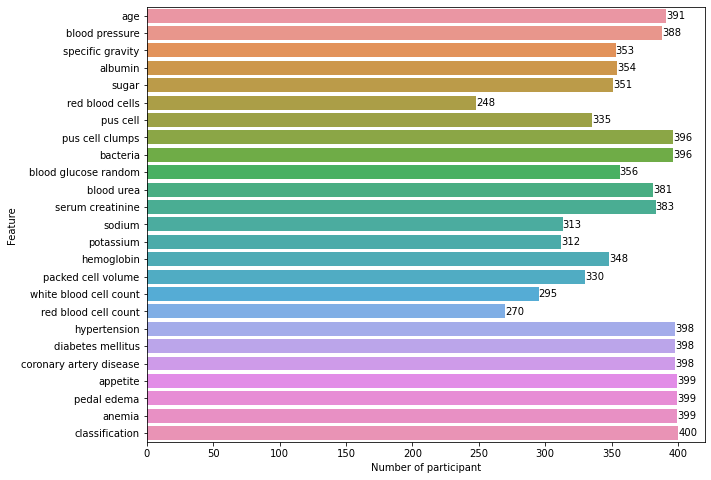

In [5]:
# Plot count of participant without NaN
def plot_count_by_feature(data_df):
    tmp_df = pd.DataFrame(data_df.count()).set_axis(['Number of participant'], axis=1)
    tmp_df.reset_index(inplace=True)
    tmp_df.rename(columns = {'index':'Feature'}, inplace = True)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='Number of participant', y='Feature', data=tmp_df)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
plot_count_by_feature(ckd_df)

Looking at this figure, we can verify quickly which feature has NaN. It means that there are participants with less data than others. Thus, in the next section we are going to try to fix this issue.

Counting nan or unrecognized values:
age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
classification               0
dtype: int64


c:\Users\ANA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


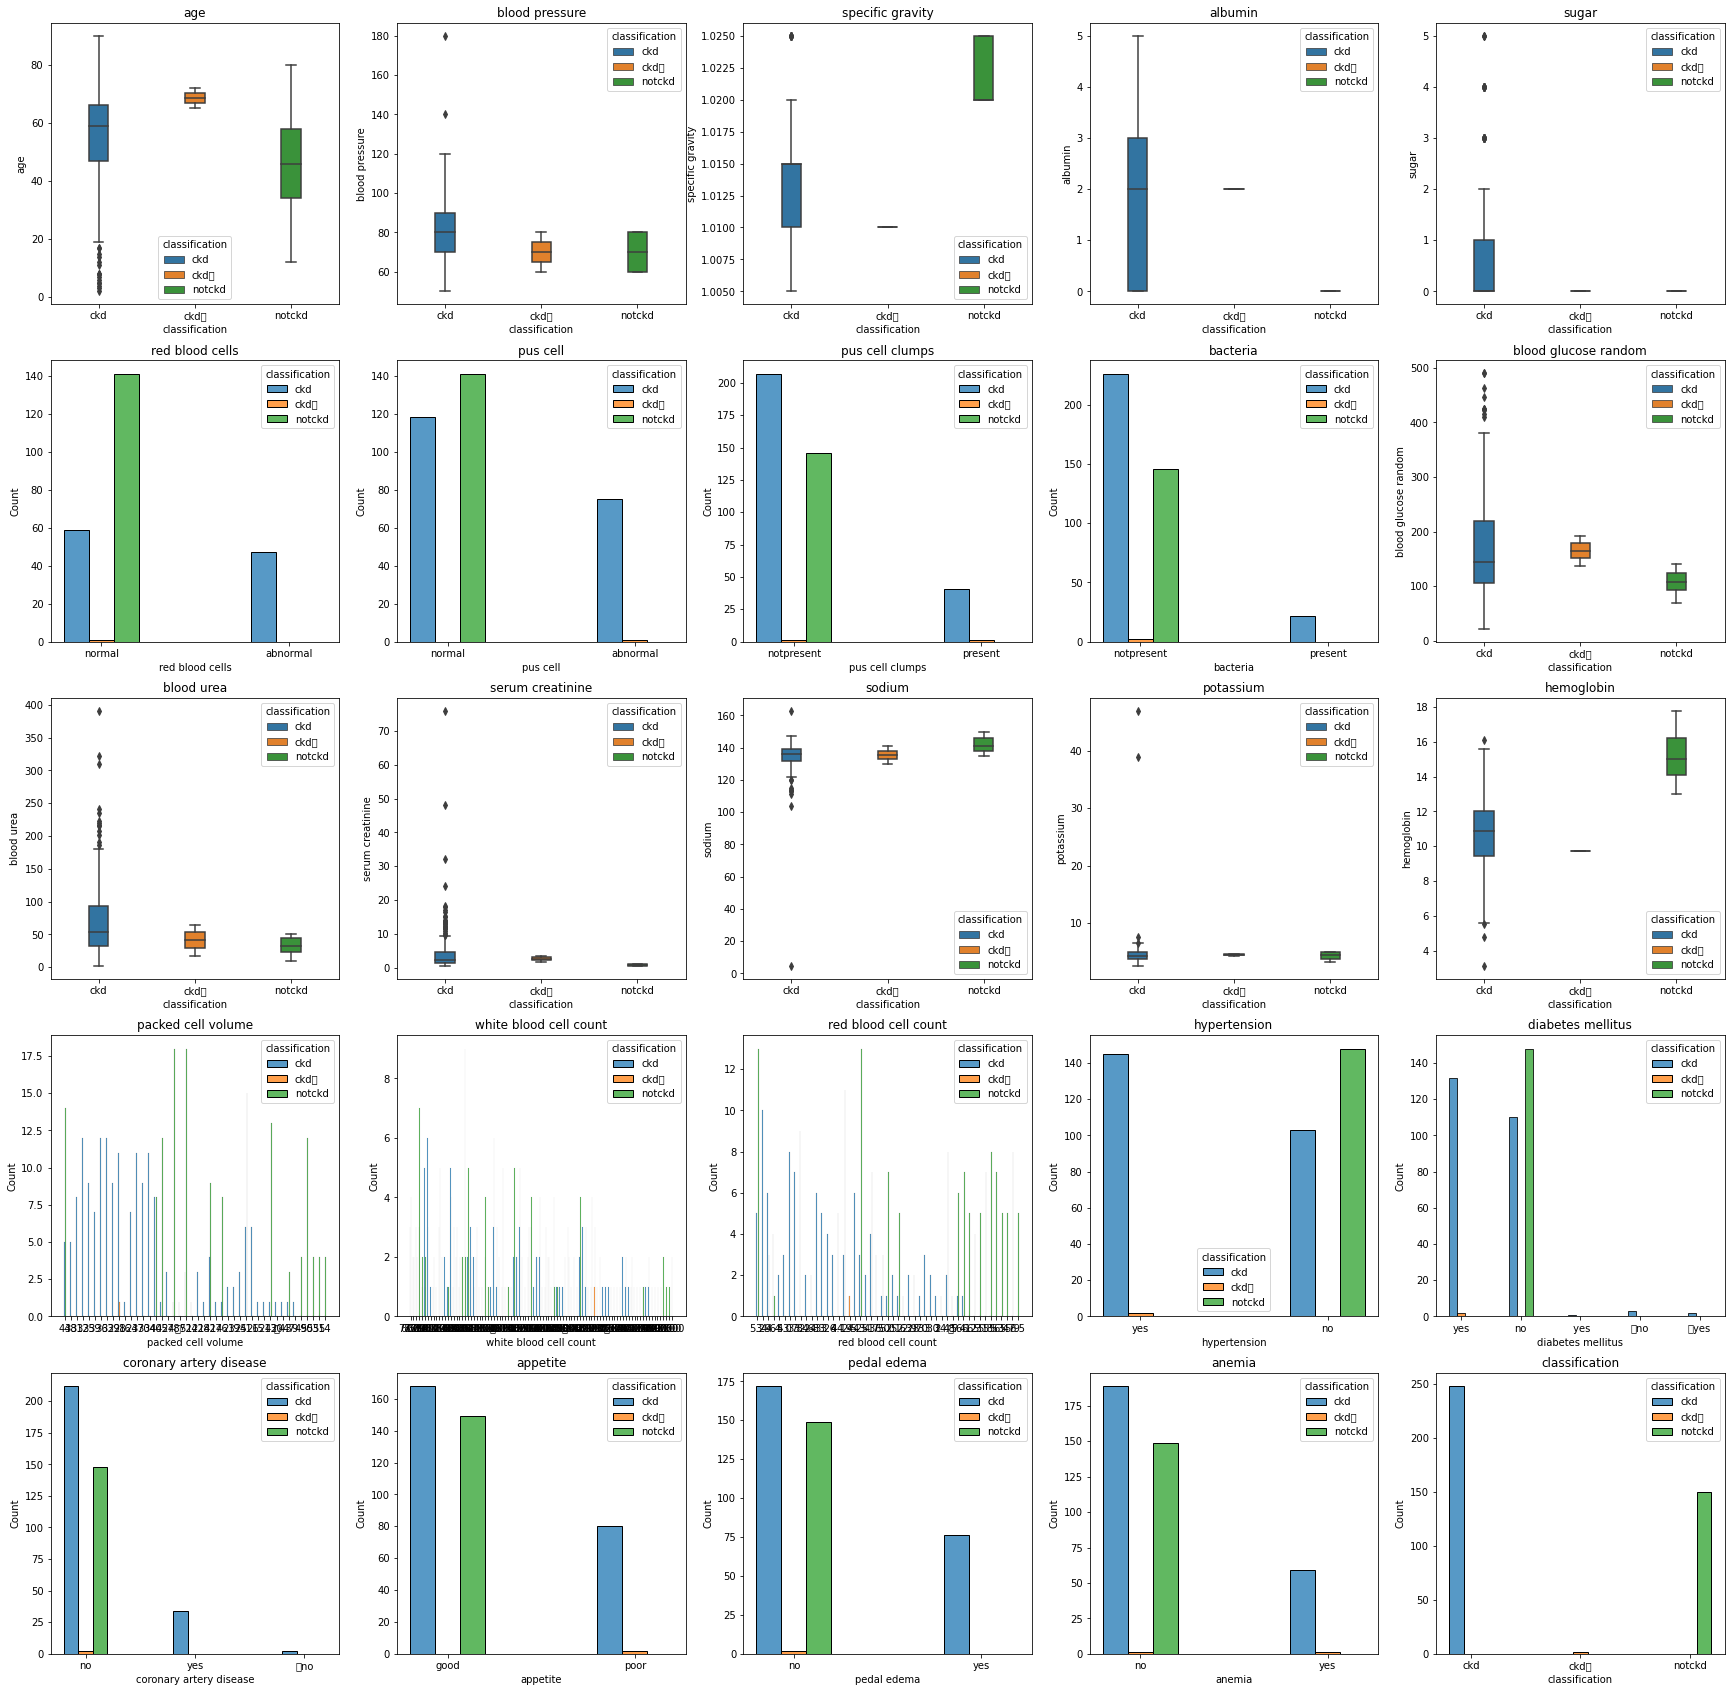

In [6]:
def plot_class_by_all(ckd_df, n_plot_columns, n_plot_rows):
    fig, axs = plt.subplots(n_plot_rows, n_plot_columns, figsize=(30, 30))
    i_row    = 0
    i_column = 0
    for i in ckd_df.columns:
        # print()
        # # print(i_row,i_column)
        if ckd_df[i].dtype != object:
            sns.boxplot(x='classification',y=i, hue = 'classification', data=ckd_df, width=0.2, dodge=False, ax=axs[i_row,i_column])
            axs[i_row,i_column].set_title(i)
        else:
            axs[i_row,i_column].set_title(i)
            sns.histplot(data=ckd_df, x=i, hue="classification", multiple="dodge",shrink=.4, ax=axs[i_row,i_column])
            # axs[i_row,i_column].tick_params(axis='x', rotation=90)
        if i_column < n_plot_columns-1: 
            i_column += 1
        elif i_column == n_plot_columns-1:
            i_column = 0
            if i_row < n_plot_rows:
                i_row += 1

print("Counting nan or unrecognized values:")
print(ckd_df.isnull().sum())

n_plot_columns = 5
n_plot_rows    = math.ceil(ckd_df.shape[1]/n_plot_columns)
plot_class_by_all(ckd_df, n_plot_columns, n_plot_rows)

It is possible to observe that there is some data needed to preprocess, clean, integrate, etc. Hence, we are going to explore our date and adapt it as well as workable. For example, there are features that have number values but are assigned as string objects. Also, there are string objects with the same name, however it has other letters (like square).

### 5. Data Exploration (EDA)
We saw in the last section, when extracted data information, there was some data that they needed to explore as well as possible to work on the algorithm model selection. Hence, now, we are going to do following job:

- Data preprocessing
- Data cleaning 
- Data integration 
- Data transformation 
- Data reduction 
- Data discretization 

In [7]:
ckd_eda_df = ckd_df
# Convert variables to the appropriate type
ckd_eda_df['red blood cell count'] = pd.to_numeric(ckd_eda_df['red blood cell count'], errors='coerce')
ckd_eda_df['white blood cell count'] = pd.to_numeric(ckd_eda_df['white blood cell count'], errors='coerce')
ckd_eda_df['packed cell volume'] = pd.to_numeric(ckd_eda_df['packed cell volume'], errors='coerce')

# Group categorical variables together in a list
cat_var = [var for var in ckd_eda_df.columns if ckd_eda_df[var].dtype == 'object']
num_var = [var for var in ckd_eda_df.columns if ckd_eda_df[var].dtype == 'float64']

# Use for loop to assess unique values and identify typos
for var in cat_var:
    print(f"{var} contains the following unique values: {ckd_eda_df[var].unique()}")

red blood cells contains the following unique values: [nan 'normal' 'abnormal']
pus cell contains the following unique values: ['normal' 'abnormal' nan]
pus cell clumps contains the following unique values: ['notpresent' 'present' nan]
bacteria contains the following unique values: ['notpresent' 'present' nan]
hypertension contains the following unique values: ['yes' 'no' nan]
diabetes mellitus contains the following unique values: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary artery disease contains the following unique values: ['no' 'yes' '\tno' nan]
appetite contains the following unique values: ['good' 'poor' nan]
pedal edema contains the following unique values: ['no' 'yes' nan]
anemia contains the following unique values: ['no' 'yes' nan]
classification contains the following unique values: ['ckd' 'ckd\t' 'notckd']


Looking at previous results, we can understand that we have to tackle some issues of data frame. First, we have to fix text errors like "\t". Then we have to find out the values to "nan". To afford this, we are going to assign a random value of known text data. In the case of the number feature with "nan", we are going to assign a random value taking into account quantile values. It means that we can be sure that we are assigning good value.

In [8]:
# Fix errors in 'diabetes_mellitus'
ckd_eda_df['diabetes mellitus'] = ckd_eda_df['diabetes mellitus'].str.strip()
ckd_eda_df['diabetes mellitus'].replace({'/tno','/tyes'}, {'no','yes'}, inplace = True)
ckd_eda_df['diabetes mellitus'].value_counts()

# Fix errors in 'coronary_artery_disease'
ckd_eda_df['coronary artery disease'].replace('\tno', 'no', inplace = True)
ckd_eda_df['coronary artery disease'].value_counts()

# Fix errors in 'classification'
ckd_eda_df['classification'].replace('ckd_df\t', 'ckd_df', inplace = True)
ckd_eda_df['classification'].value_counts()

ckd_eda_df['classification'].replace(to_replace='ckd\t', value='ckd', inplace=True)
ckd_eda_df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [9]:
def impute_randomsample(variable):
    if ckd_eda_df[variable].dtype == 'float64':
        ckd_eda_ckd_df = ckd_eda_df[ckd_eda_df['classification'] == 'ckd'][variable]
        n_na_ckd       = ckd_eda_ckd_df.isna().sum()
        if n_na_ckd > 0:
            Q1_ckd = ckd_eda_ckd_df.dropna().quantile(0.25)
            Q3_ckd = ckd_eda_ckd_df.dropna().quantile(0.75) if Q1_ckd > 0 else ckd_eda_df[variable].dropna().quantile(1)

            IQR_ckd = Q3_ckd - Q1_ckd
            outline_ckd_low  = (Q1_ckd - 1.5*IQR_ckd) 
            outline_ckd_high = (Q3_ckd + 1.5*IQR_ckd)
            randomsample_ckd = pd.DataFrame(np.random.uniform(  outline_ckd_low, 
                                                                outline_ckd_high, 
                                                                size=(n_na_ckd, 1)), 
                                            columns=[variable])
            
            test_df1 = ckd_eda_df[ckd_eda_df['classification'] == 'ckd'][variable]
            randomsample_ckd.index = test_df1[test_df1.isnull()].index
            ckd_eda_df.loc[randomsample_ckd.index, variable] = randomsample_ckd

        ckd_eda_notckd_df = ckd_eda_df[ckd_eda_df['classification'] == 'notckd'][variable]
        n_na_notckd = ckd_eda_notckd_df.isna().sum()
        if n_na_notckd > 0:
            Q1_notckd = ckd_eda_notckd_df.dropna().quantile(0.25)
            Q3_notckd = ckd_eda_notckd_df.dropna().quantile(0.75) if Q1_notckd > 0 else ckd_eda_df[variable].dropna().quantile(1)

            IQR_notckd = Q3_notckd - Q1_notckd
            outline_notckd_low = (Q1_notckd - 1.5*IQR_notckd) 
            outline_notckd_high = (Q3_notckd + 1.5*IQR_notckd)

            randomsample_notckd = pd.DataFrame(np.random.uniform(   outline_notckd_low, 
                                                                    outline_notckd_high, 
                                                                    size=(n_na_notckd, 1)), 
                                                columns=[variable])

            test_df2 = ckd_eda_df[ckd_eda_df['classification'] == 'notckd'][variable]
            randomsample_notckd.index = test_df2[test_df2.isnull()].index
            ckd_eda_df.loc[randomsample_notckd.index, variable] = randomsample_notckd
    else:
        # ckd_eda_ckd_df = ckd_eda_df[ckd_eda_df['classification'] == 'ckd'][variable]
        # n_na_ckd       = ckd_eda_ckd_df.isna().sum()
        # if n_na_ckd > 0:
        #     randomsample_ckd = ckd_eda_ckd_df.dropna().sample(n_na_ckd)

        #     randomsample_ckd.index = ckd_eda_ckd_df[ckd_eda_ckd_df.isnull()].index
        #     ckd_eda_df.loc[randomsample_ckd.index, variable] = randomsample_ckd

        #     randomsample_ckd.index = ckd_eda_df[ckd_eda_df[variable].isnull()].index
        #     ckd_eda_df.loc[ckd_eda_ckd_df.isnull(), variable] = randomsample_ckd   
        randomsample = ckd_eda_df[variable].dropna().sample(ckd_eda_df[variable].isna().sum())
        randomsample.index = ckd_eda_df[ckd_eda_df[variable].isnull()].index
        ckd_eda_df.loc[ckd_eda_df[variable].isnull(), variable] = randomsample   

In [10]:
for var in cat_var:
    impute_randomsample(var)
for var in num_var:
    impute_randomsample(var)
    
print("\nData filled:")
for var in cat_var:
    print(f"{var} contains the following unique values: {ckd_eda_df[var].unique()}")


Data filled:
red blood cells contains the following unique values: ['normal' 'abnormal']
pus cell contains the following unique values: ['normal' 'abnormal']
pus cell clumps contains the following unique values: ['notpresent' 'present']
bacteria contains the following unique values: ['notpresent' 'present']
hypertension contains the following unique values: ['yes' 'no']
diabetes mellitus contains the following unique values: ['yes' 'no']
coronary artery disease contains the following unique values: ['no' 'yes']
appetite contains the following unique values: ['good' 'poor']
pedal edema contains the following unique values: ['no' 'yes']
anemia contains the following unique values: ['no' 'yes']
classification contains the following unique values: ['ckd' 'notckd']


age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classification             0
dtype: int64
Plot each feature by classification:


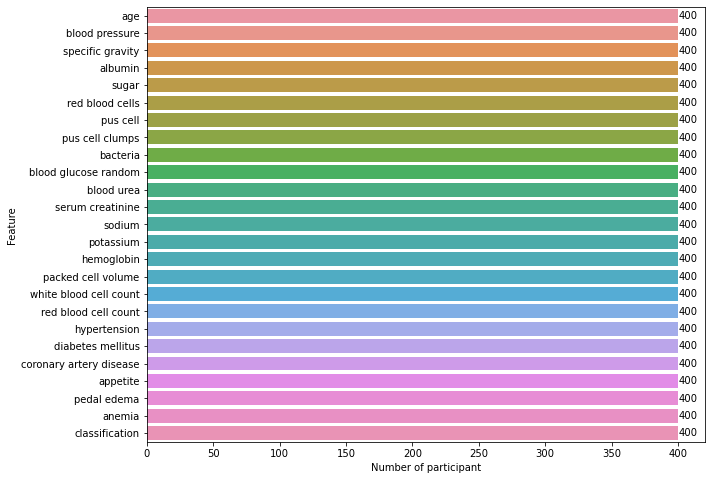

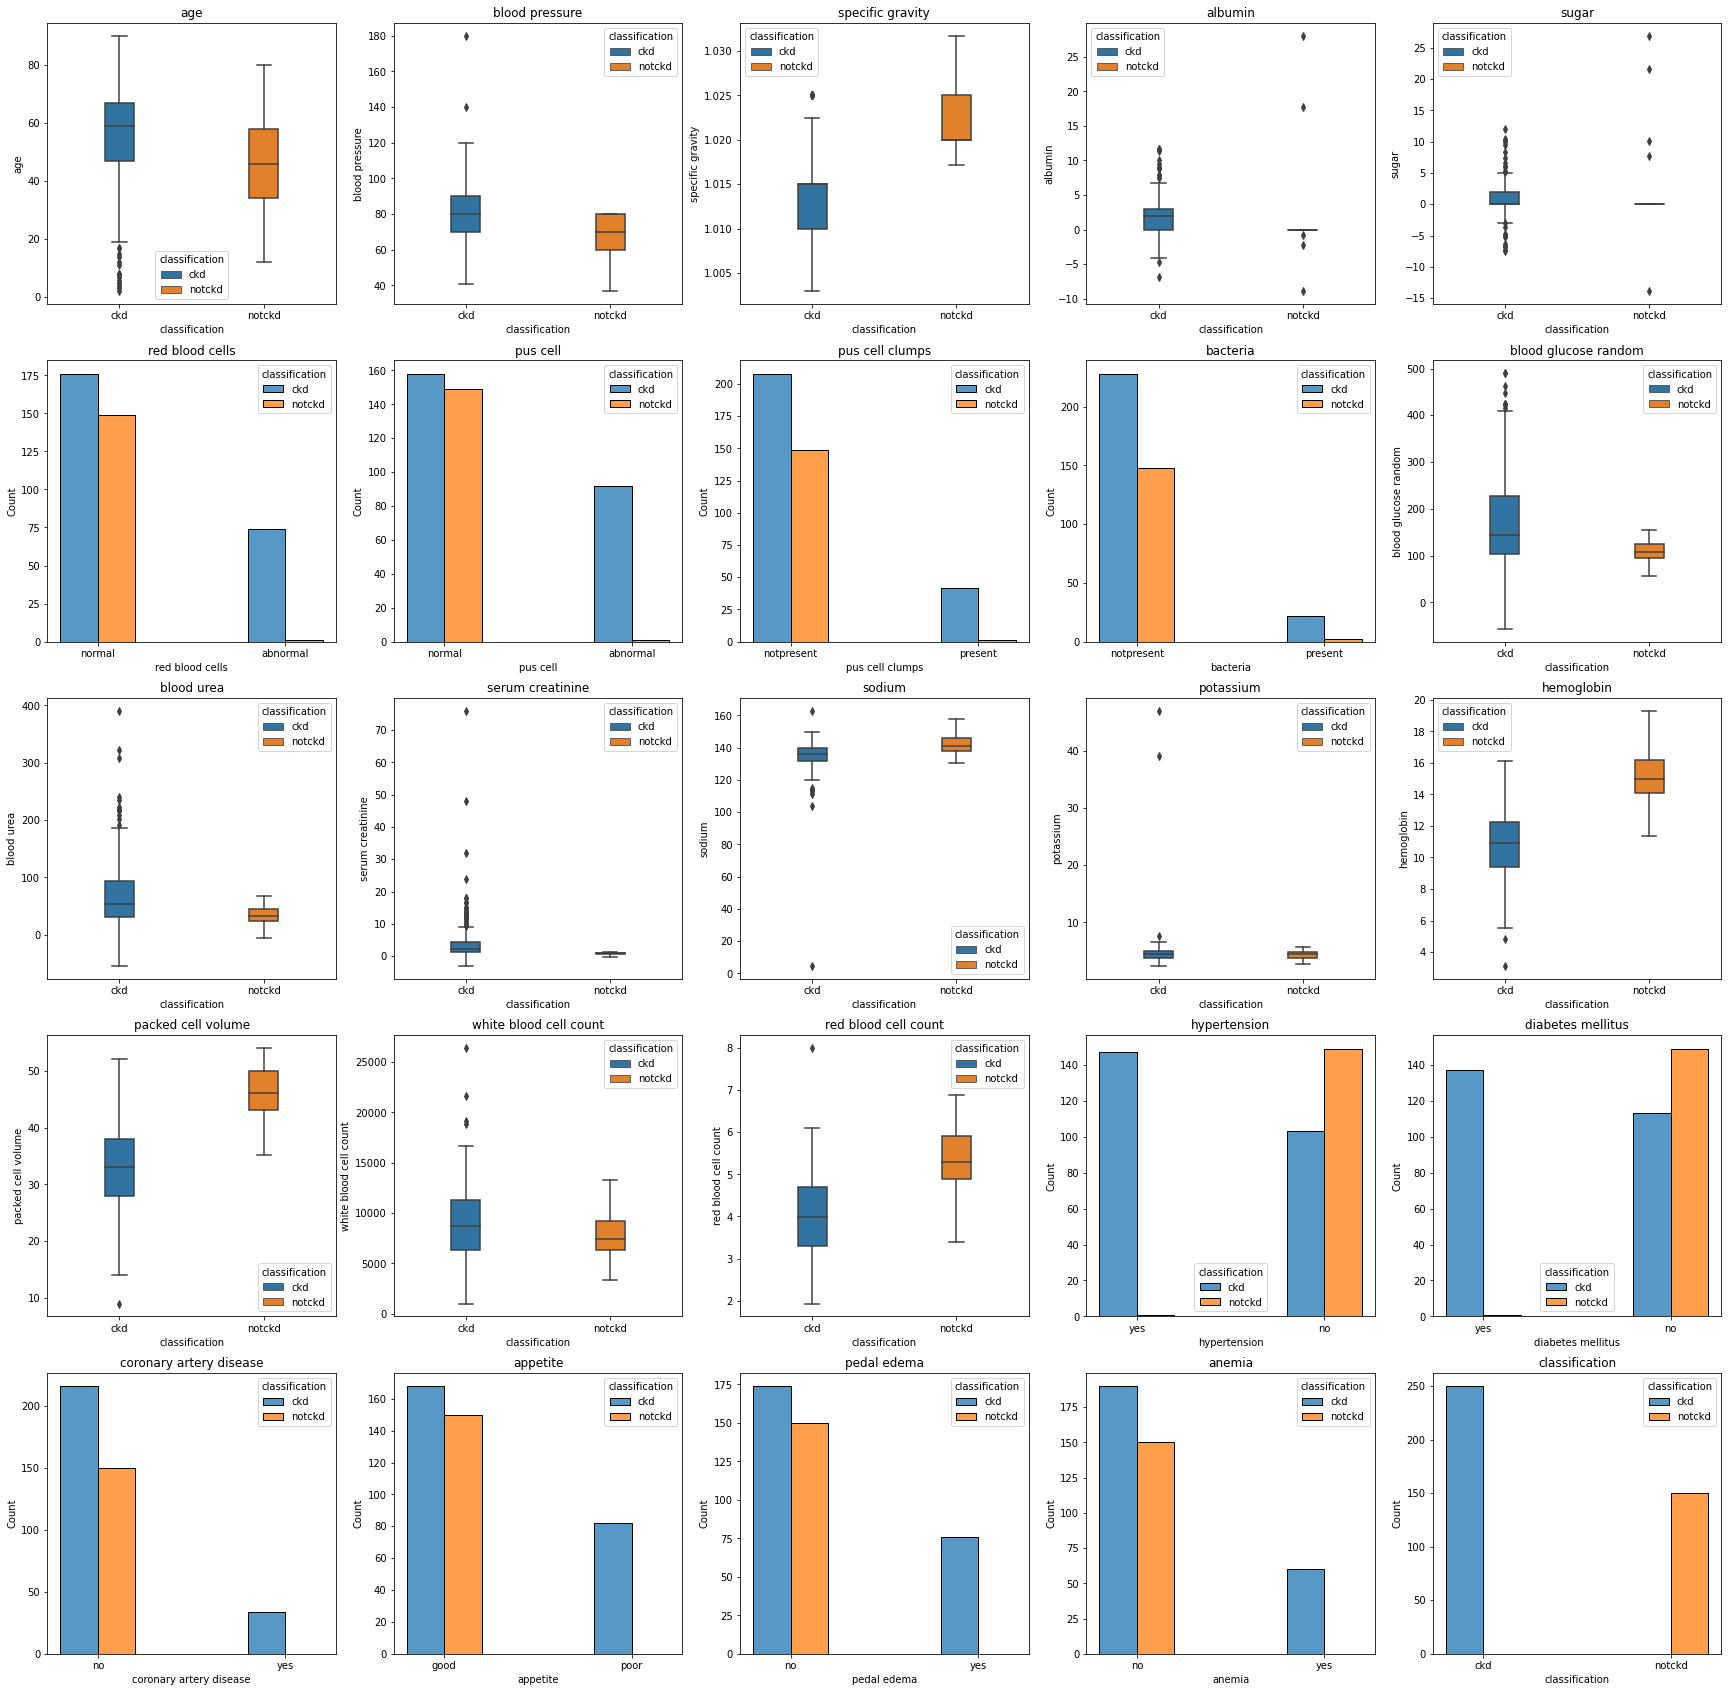

In [11]:
# Verify data frame don't have unrecognized values
nan_value = ckd_eda_df.isnull().sum()
print(nan_value)
plot_count_by_feature(ckd_eda_df)
print("Plot each feature by classification:")
plot_class_by_all(ckd_eda_df, n_plot_columns, n_plot_rows)

Now, we can verify that there is some numeric outline data. For example “serum creatinine” (main value to be observed for CKD), “sodium”, "potassium" and etc. Hence, we have to analyze what we have to do. In some cases we have to leave, in others we have to manage carefully (example remove or change).

Text(0.5, 0.98, 'Chronic Kidney Disease - data frame with EDA\nCKD classification, Serum creatinine, Sodium, Potassium')

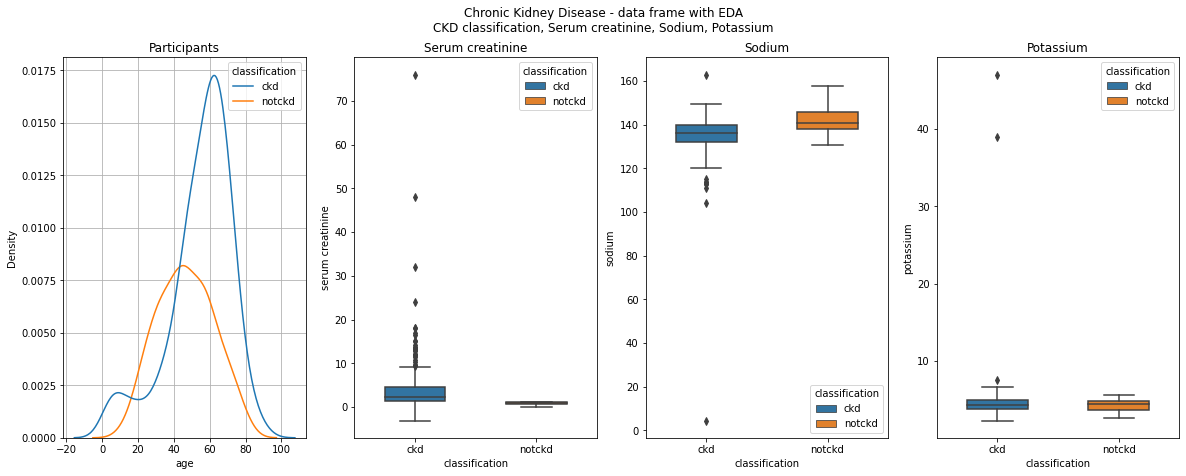

In [12]:
fig, axs = plt.subplots(1,4,figsize=(20, 7))
axs[0].set_title('Participants')
# sns.histplot(data=ckd_eda_df, x='age', hue="classification",kde=True, ax=axs[0])
sns.kdeplot(data=ckd_eda_df, x="age", hue="classification", ax=axs[0])
axs[0].grid(True)
axs[1].set_title('Serum creatinine')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[1])
axs[2].set_title('Sodium')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[2])
axs[3].set_title('Potassium')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[3])

fig.suptitle("Chronic Kidney Disease - data frame with EDA\nCKD classification, Serum creatinine, Sodium, Potassium")

#### Quartile analysis to clean data
Also, we are going to clean the data of those that are outside the natural values. To do this we are going to take the quartiles of the important data such as "serum creatinine", sodium and potassium.

In [13]:
# Value of quartils
Q1_sc  = ckd_eda_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_eda_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")

Q1_sod  = ckd_eda_df['sodium'].quantile(0.25)
Q3_sod  = ckd_eda_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")

Q1_pot  = ckd_eda_df['potassium'].quantile(0.25)
Q3_pot  = ckd_eda_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")

SERUM CREATININE
Q1_sc:0.9	 Q3_sc:2.8	 IQR_sc:1.9
SODIUM:
Q1_sod:135.0	 Q3_sod:142.0	 IQR_sod:7.0
POTASSIUM:
Q1_pot:3.8	 Q3_pot:4.9	 IQR_pot:1.1000000000000005


In [14]:
# Transform outlines 
ckd_eda_trform_df = ckd_eda_df[ckd_eda_df['serum creatinine']> (Q1_sc - 1.5*IQR_sc)]
ckd_eda_trform_df = ckd_eda_trform_df[ckd_eda_trform_df['serum creatinine']< (Q3_sc + 1.5*IQR_sc)]

ckd_eda_trform_df = ckd_eda_trform_df[ckd_eda_trform_df['sodium']> (Q1_sod - 1.5*IQR_sod)]
ckd_eda_trform_df = ckd_eda_trform_df[ckd_eda_trform_df['sodium']< (Q3_sod + 1.5*IQR_sod)]

ckd_eda_trform_df = ckd_eda_trform_df[ckd_eda_trform_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_eda_trform_df = ckd_eda_trform_df[ckd_eda_trform_df['potassium']< (Q3_pot + 1.5*IQR_pot)]

We have removed those data that are outside the quartiles. Hence, we have to verify if this cleaning makes sense.

Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

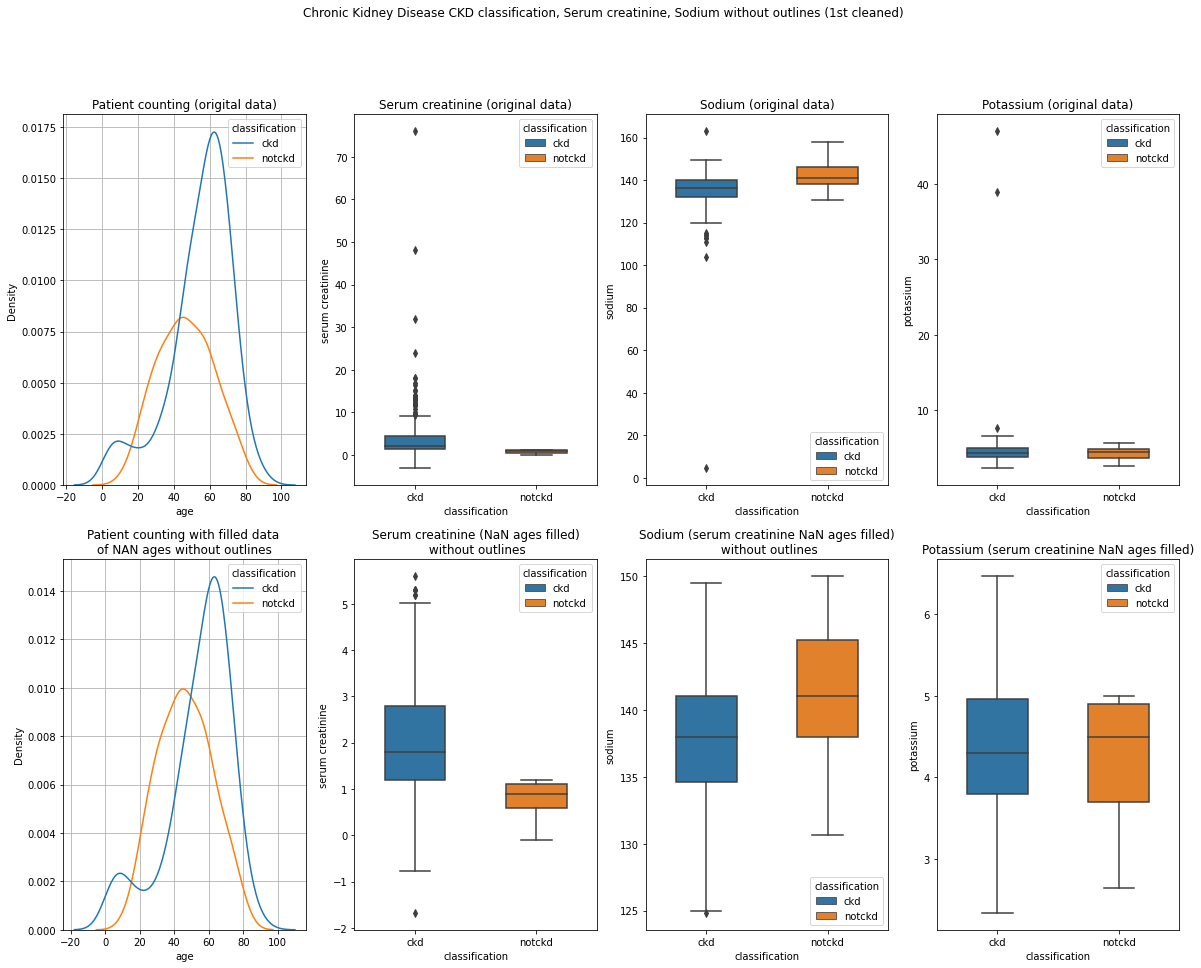

In [15]:
# Verify outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
# sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
sns.kdeplot(data=ckd_eda_df, x="age", hue="classification", ax=axs[0,0])
axs[0,0].grid(True)
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
# sns.histplot(data=ckd_eda_trform_df, x='age', hue="classification", ax=axs[1,0])
sns.kdeplot(data=ckd_eda_trform_df, x="age", hue="classification", ax=axs[1,0])
axs[1,0].grid(True)
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_eda_trform_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_eda_trform_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_eda_trform_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

We can note that the Potassium figure has an outside value. So, we are going to clean this outsider.

In [16]:
# Fix potassium outlines
ckd_eda_trform_df = ckd_eda_trform_df[ckd_eda_trform_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_eda_trform_df = ckd_eda_trform_df[ckd_eda_trform_df['potassium']< (Q3_pot + 1.2*IQR_pot)]

Q1_pot  = ckd_eda_trform_df['potassium'].quantile(0.25)
Q3_pot  = ckd_eda_trform_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")


# Fix serum creatinine value of notckd
Q1_notckd_sc  = ckd_eda_trform_df[ckd_eda_trform_df['classification']=='notckd']['serum creatinine'].quantile(0.25)
Q3_notckd_sc  = ckd_eda_trform_df[ckd_eda_trform_df['classification']=='notckd']['serum creatinine'].quantile(0.75)
IQR_notckd_sc = Q3_notckd_sc - Q1_notckd_sc

notckd_df = ckd_eda_trform_df[ckd_eda_trform_df['classification']=='notckd']
fix_notckd_index = notckd_df[notckd_df['serum creatinine'] > (Q3_notckd_sc + 1.5*IQR_notckd_sc)].index.tolist()
ckd_eda_trform_df['serum creatinine'].loc[fix_notckd_index] = Q3_notckd_sc + 1.5*IQR_notckd_sc
if len(fix_notckd_index)>1:
    print(f"There are {len(fix_notckd_index)} with suspicious value. They are #{fix_notckd_index} participants.")
elif len(fix_notckd_index)==1:
    print(f"There is 1 with suspicious value. It is the #{fix_notckd_index} participant.")

POTASSIUM:
Q1_pot:3.7084844706448385	 Q3_pot:4.9	 IQR_pot:1.1915155293551618


Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

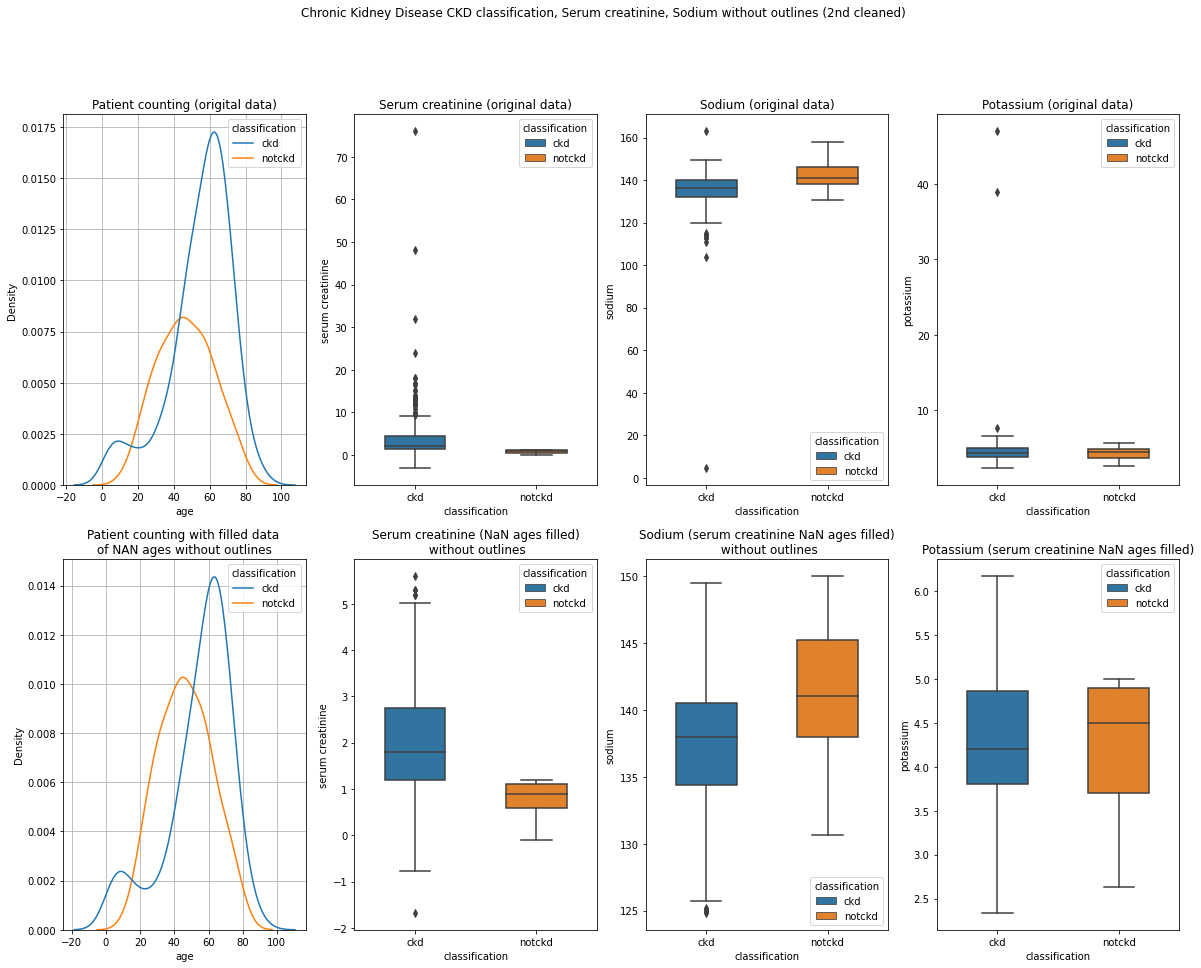

In [17]:
# Verify (2nd) outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
# sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
sns.kdeplot(data=ckd_df, x="age", hue="classification", ax=axs[0,0])
axs[0,0].grid(True)
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
# sns.histplot(data=ckd_eda_trform_df, x='age', hue="classification", ax=axs[1,0])
sns.kdeplot(data=ckd_eda_trform_df, x="age", hue="classification", ax=axs[1,0])
axs[1,0].grid(True)
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_eda_trform_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_eda_trform_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_eda_trform_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

Watching these figures, we have to take into account that it loses data when we clean it.

In [18]:
# Resulting values of quartils
print("Resulting values of quartils")
Q1_sc  = ckd_eda_trform_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_eda_trform_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")
print(f"Lower sc inliner: {Q1_sc - 1.5*IQR_sc} \nUpper sc inliner: {Q3_sc + 1.5*IQR_sc}\n")

Q1_sod  = ckd_eda_trform_df['sodium'].quantile(0.25)
Q3_sod  = ckd_eda_trform_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")
print(f"Lower sod inliner: {Q1_sod - 1.5*IQR_sod} \nUpper sod inliner: {Q3_sod + 1.5*IQR_sod}\n")

Q1_pot  = ckd_eda_trform_df['potassium'].quantile(0.25)
Q3_pot  = ckd_eda_trform_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")
print(f"Lower sod inliner: {Q1_pot - 1.5*IQR_pot} \nUpper sod inliner: {Q3_pot + 1.2*IQR_pot}\n")

Resulting values of quartils
SERUM CREATININE
Q1_sc:0.8	 Q3_sc:1.9	 IQR_sc:1.0999999999999999
Lower sc inliner: -0.8499999999999999 
Upper sc inliner: 3.55

SODIUM:
Q1_sod:135.27966474439262	 Q3_sod:142.98332452464712	 IQR_sod:7.7036597802544975
Lower sod inliner: 123.72417507401087 
Upper sod inliner: 154.53881419502886

POTASSIUM:
Q1_pot:3.7084844706448385	 Q3_pot:4.9	 IQR_pot:1.1915155293551618
Lower sod inliner: 1.9212111766120958 
Upper sod inliner: 6.329818635226195



Now, we are goint to plot regression of "Serum creatinine" by each numeric data.

In [19]:
def regplot_creatinine_by_feature(df, x, ax):
    for i, value in enumerate(df["classification"].unique()):
        ax = sns.regplot(x=x, y="serum creatinine", 
                            ax=ax,color=colors[i],marker=markers[i],
                            data=df[df.classification == value],label=value)
        ax.legend(loc='best') 
    ax.set_title("Creatinine by "+x)

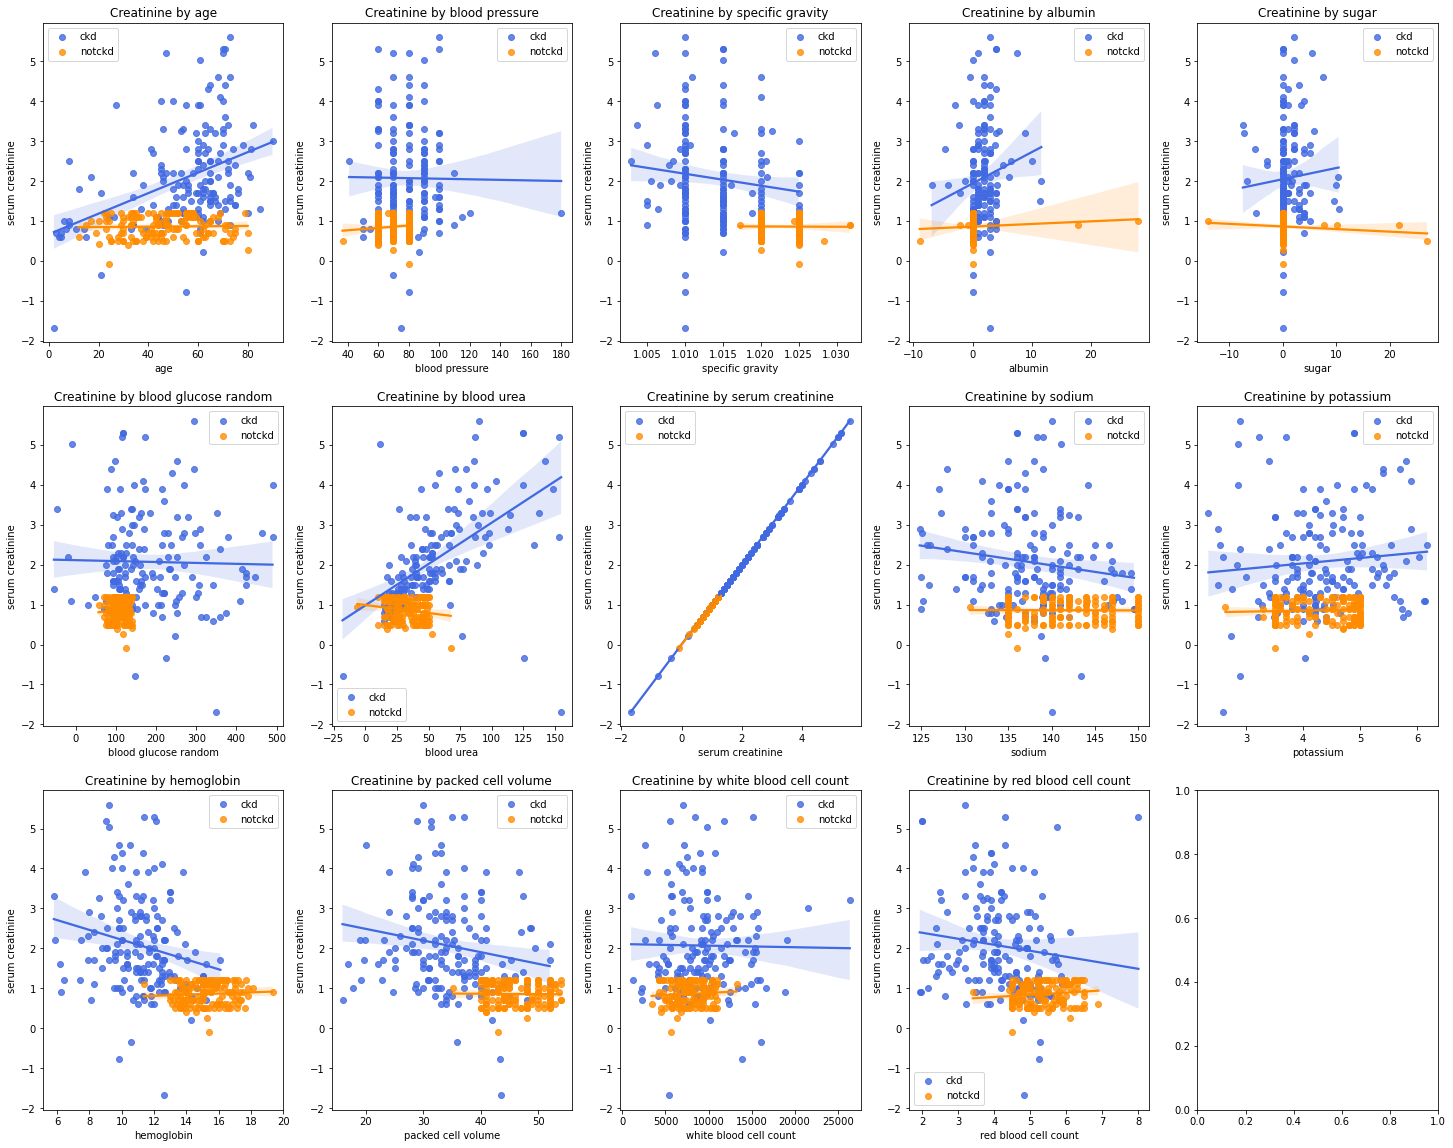

In [20]:
ckd_eda_float_df = ckd_eda_trform_df.select_dtypes("float64")

ckd_eda_float_features = ckd_eda_float_df.columns
n_float_feature = len(ckd_eda_float_features)

n_plot_columns = 5
n_plot_rows    = math.ceil(n_float_feature/n_plot_columns)

fig, axs = plt.subplots(n_plot_rows,n_plot_columns,figsize=(25, 20),facecolor = 'white')
colors = ['royalblue', 'darkorange']
markers = ['o', 'o']

i_plot_rows    = 0
i_plot_columns = 0

for feature in ckd_eda_float_features:
    regplot_creatinine_by_feature(ckd_eda_trform_df, feature, axs[i_plot_rows, i_plot_columns])
    if i_plot_columns < n_plot_columns-1:
        i_plot_columns += 1
    elif i_plot_rows < n_plot_rows-1:
        i_plot_rows   += 1
        i_plot_columns = 0


At this time, looking at figures, we can understand that CKD has high Serum creatinine.

Now, we are going to analysis relation "Serum creatinine" and "Sodium" who has "anemia" and "hypertension".

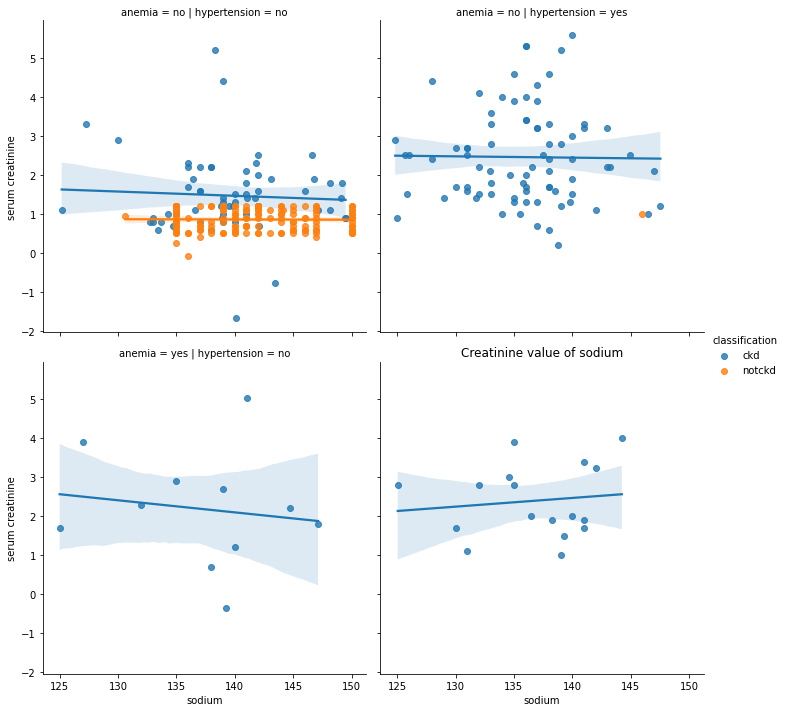

In [21]:
sns.lmplot(x="sodium", y="serum creatinine", hue="classification", col="hypertension", row="anemia", data=ckd_eda_trform_df)
ax = plt.gca()
ax.set_title("Creatinine value of sodium")
plt.show()

Doing Data Exploration, we can learn and conclude some of the analysis. And one of the most relevant conclusion is that we can know that people who doesn't have anemia and hypertension are not CKD. Also, most of the CKD patients have high Serum Creatinine.

In [22]:
ckd_eda_df = ckd_eda_trform_df

### 6. Data engineering

#### Data Correlation Heatmap
We are going to try to visualize the correlation between different variables (or features) in a dataset with a Matrix Correlation Heatmap. Each cell in the matrix will represent how one variable relates to another. With this technique we are going to Identify Relationships and select the relevant features to analyze deeply.

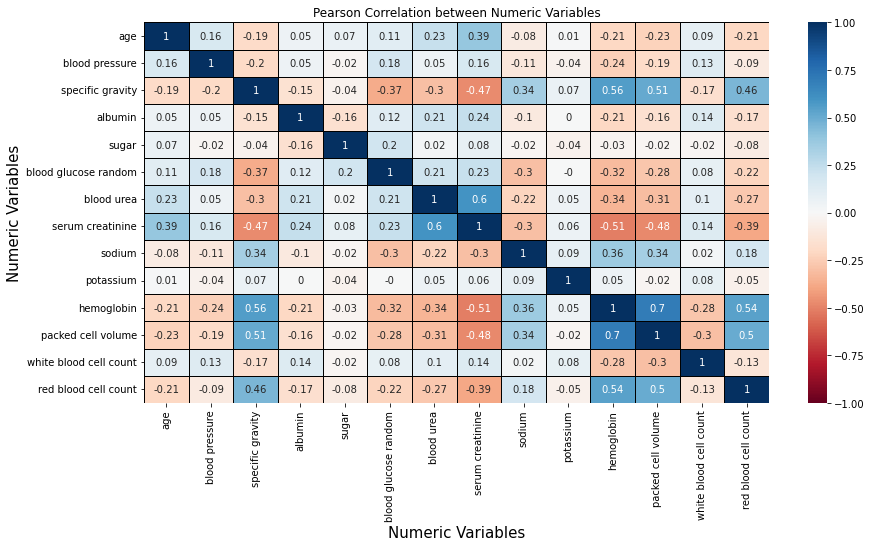

In [23]:
# Graph Heatmap to show corelations
plt.figure(figsize = (14, 7))

# correlacion = ckd_eda_df.corr()
sns.heatmap(ckd_eda_df.corr(method='pearson').round(2), cmap='RdBu', vmin=-1, vmax=1, annot=True, linewidths = 1, linecolor = 'black')
plt.title('Pearson Correlation between Numeric Variables')
plt.xlabel('Numeric Variables',fontsize=15)
plt.ylabel('Numeric Variables',fontsize=15)
plt.show()

Hence we see that the relevant features are "blood urea" vs "serum creatinine" and "hemoglobin" vs "packed cell volume". So, we will plot those features.

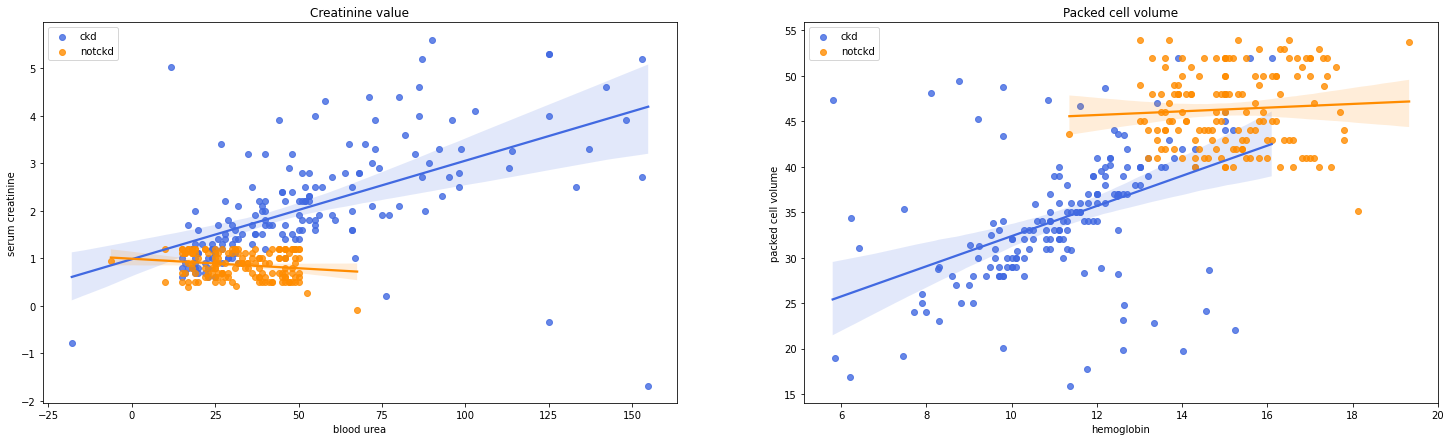

In [24]:
fig, axs = plt.subplots(1,2,figsize=(25, 7),facecolor = 'white')
colors = ['royalblue', 'darkorange']
markers = ['o', 'o']

for i, value in enumerate(ckd_eda_df["classification"].unique()):
    axs[0] = sns.regplot(x="blood urea", y="serum creatinine", 
                        ax=axs[0],color=colors[i],marker=markers[i],
                        data=ckd_eda_df[ckd_eda_df.classification == value],label=value)
    axs[0].legend(loc='best') 
axs[0].set_title("Creatinine value")

for i, value in enumerate(ckd_eda_df["classification"].unique()):
    axs[1] = sns.regplot(x="hemoglobin", y="packed cell volume", 
                        ax=axs[1],color=colors[i],marker=markers[i],
                        data=ckd_eda_df[ckd_eda_df.classification == value],label=value)
    axs[1].legend(loc='best') 
axs[1].set_title("Packed cell volume")

display(fig) 
plt.close('all')


Looking at this figure, we don't have a big conclusion of a specific and clear behavior. But we can verify that "serum creatinine" is higher for CKD and "packed cell volume" is lower than not CKD patients.


Now, we are going to plot feature correlation again taking into account string data. 

In [25]:
# Convert series of strings to dymmy codes
ckd_encoded_df=pd.get_dummies(ckd_eda_df, drop_first='True')

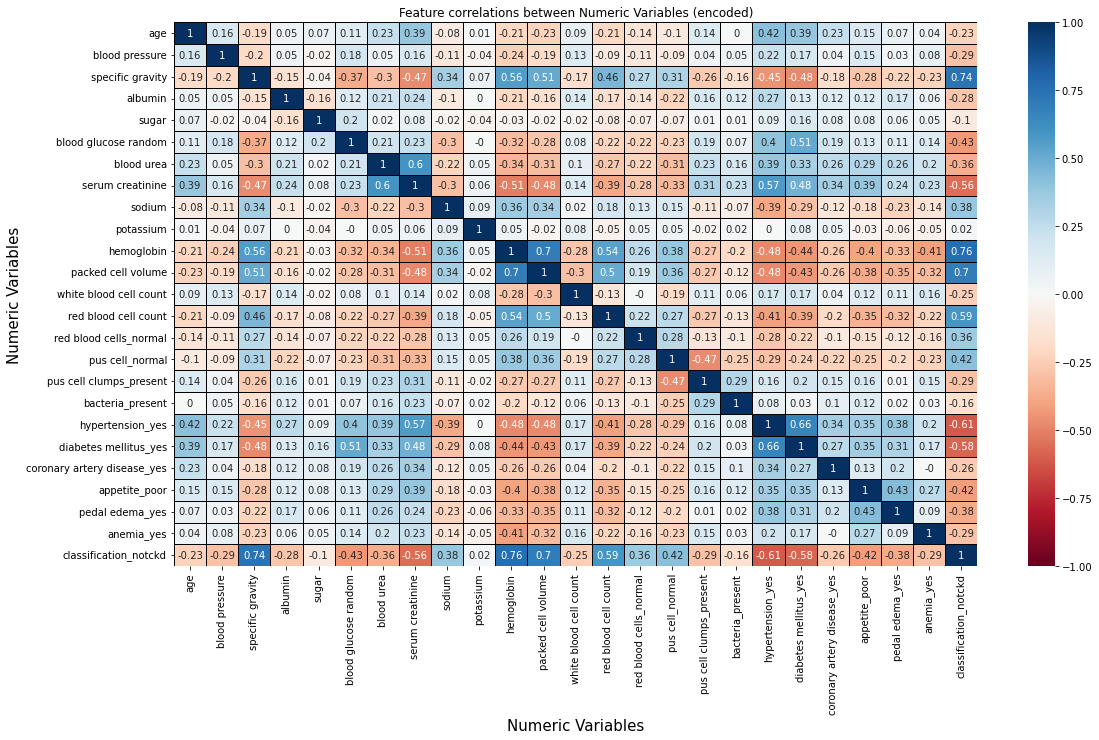

In [26]:
# Graph Heatmap to show corelations
plt.figure(figsize = (18, 10))

sns.heatmap(ckd_encoded_df.corr(method='pearson').round(2), cmap='RdBu', vmin=-1, vmax=1, annot=True, linewidths = 1, linecolor = 'black')
plt.title('Feature correlations between Numeric Variables (encoded)')
plt.xlabel('Numeric Variables',fontsize=15)
plt.ylabel('Numeric Variables',fontsize=15)
plt.show()

Now, it highlights that "hemoglobin" and "specific gravity" have relevant correlations compared to others. Therefore, let's plot and see what could we learn.

<AxesSubplot:xlabel='classification_notckd', ylabel='hemoglobin'>

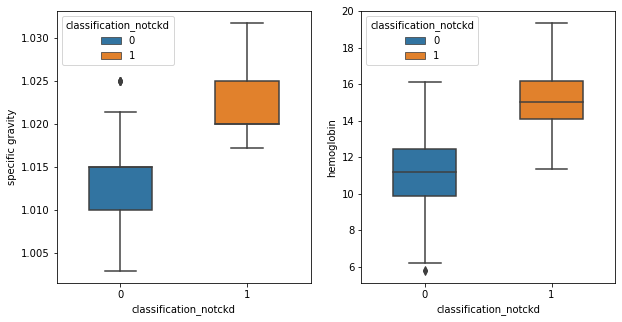

In [27]:
ckd_encoded_df['classification_notckd']
fig, axs = plt.subplots(1,2,figsize=(10, 5))

sns.boxplot(x='classification_notckd',y='specific gravity', hue = 'classification_notckd', data=ckd_encoded_df, width=0.5, dodge=False, ax=axs[0])
sns.boxplot(x='classification_notckd',y='hemoglobin', hue = 'classification_notckd', data=ckd_encoded_df, width=0.5, dodge=False, ax=axs[1])

It is possible understand that the specific gravity and hemoglobin have well distributed distributions.

### 7. Suitable algorithm selection
Now we are going to use the Machine Learning models to automate the prediction of CKD patients. It means that we are going to create a machine that can learn the classification of our table (data frame) and then show us who are CKD.
Today there are a lot of models of Machine Learning. Broadly, they classify in two big groups: Supervised Learning Models and Unsupervised Learning Models.
- *Supervised Learning*: It is a type of machine learning where the algorithm is trained on a labeled dataset, meaning that it learns from input-output pairs, and its goal is to learn a mapping from inputs to outputs.
- *Unsupervised learning*: These kinds of machines use algorithms that learn patterns and structures in data without explicit supervision or labeled output. It's commonly used for tasks like clustering and dimensionality reduction.

What we want is classify who is CKD. Hence, we are going to use supervised learning models. Some of the common models are: 
- *Linear Regression*: Linear regression is used for regression tasks, where the goal is to predict a continuous numeric value. It fits a linear equation to the data to model the relationship between input features and the target variable.
- *Logistic Regression*: Logistic regression is used for binary classification problems, where the output is a binary (0/1) label. It models the probability that a given input belongs to one of the two classes.
- *Decision Trees*: Decision trees are versatile models used for both classification and regression. They make predictions by recursively partitioning the input space into regions and assigning a class or value to each region.
- *Random Forests*: Random forests are an ensemble of decision trees. They combine the predictions of multiple decision trees to improve accuracy and reduce overfitting.
- *Support Vector Machines (SVM)*: SVM is used for binary classification and can be extended to multiclass problems. It finds a hyperplane that best separates the data into different classes while maximizing the margin between the classes.
- *K-Nearest Neighbors (K-NN)*: K-NN is used for both classification and regression. It makes predictions based on the majority class among its k-nearest neighbors in the training data.


    Model: Supervised learning
    - Classification: decision trees and logistic regression
    - Regression

In [28]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, recall_score,precision_score,classification_report

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

### Feature selection
Looking at the last figure, the Correlation figure, we are going to check out what features could be the best option.
Apparently it seems that "blood urea", "serum creatinine", "hemoglobin" and "packed cell volume" have best correlations. Hence, we are going to search which of feature is best option by:
- forward, 
- backward elimination or 
- stepwise selection methods.

In [29]:
# Feature selection funtions

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    pvals = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
            pvals.append(new_pval.min())
            # print(best_features, new_pval.min())
        else:
            break
    return best_features, pvals

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    worst_features = []
    pvals = []
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        # print(features, p_values.min())
        pvals.append(p_values.min()) #
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            worst_features.append(excluded_feature)
            # pvals.append(p_values.max())
        else:
            break
    return features, worst_features, pvals

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    pvals = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            pvals.append(new_pval.min())
            # print(best_features, new_pval.min())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                    pvals.append(p_values.max())
                    # print(best_features, p_values.max())
                else:
                    break
        else:
            break
    return best_features, pvals

# Select best features taking to account forward, backward and stepwise methods.
def select_best_features(data, target, significance_level = 0.05):
    best_features_fwd, pvals_fwd = forward_selection(data, target, significance_level=significance_level)
    best_features_bck, worst_features_bck, pvals_bck = backward_elimination(data, target,significance_level = significance_level)
    best_features_stw, pvals_stw = stepwise_selection(data, target, SL_in=significance_level, SL_out = significance_level)
    pvals_select = {
        'forward':  max(pvals_fwd),
        'backward': max(pvals_bck),
        'stepwise': max(pvals_stw)
    }
    features_select = {
        'forward':  [best_features_fwd, pvals_fwd],
        'backward': [best_features_bck, pvals_bck],
        'stepwise': [best_features_stw, pvals_stw]
    }
    best_key = [key for key, value in pvals_select.items() if value == max(pvals_select.values())]
    # print("Best selector",best_key)
    # print(max(pvals_select.values()))
    return features_select[best_key[0]][0], features_select[best_key[0]][1]

# Based on the list of the targets, it selects best feature.
def feature_selector(data_df, targets, target_pivot, significance_level):
    select_pvals = [0]
    select_features = []
    select_target = []
    for i_target in targets:
        x = data_df.drop(target_pivot+[i_target], axis=1)
        y = data_df[i_target]
        best_features, pvals = select_best_features(x, y, significance_level)
        if max(select_pvals) < max(pvals):
            select_pvals = pvals
            select_features = best_features
            select_target = i_target
    # print(len(select_pvals))
    # print(len(select_features))
    return select_target, select_features, select_pvals

In [30]:
targets_df = ['blood urea','serum creatinine','specific gravity','hemoglobin','packed cell volume']
target_pivot = ['classification_notckd']
select_target, select_features, select_pvals = feature_selector(data_df = ckd_encoded_df, 
                                                 targets = targets_df,
                                                 target_pivot = target_pivot,
                                                 significance_level = 0.05)

In [31]:
print("Best feature selection:")
print(f"-y: {select_target}")
print(f"-x: {select_features}")

Best feature selection:
-y: specific gravity
-x: ['hemoglobin', 'diabetes mellitus_yes', 'serum creatinine', 'red blood cell count', 'blood glucose random', 'sodium']


Since our intention is CKD, we are going to do this selection only with the "classification_notckd" target.

In [32]:
targets_df = ['classification_notckd']
target_pivot = []
select_target, select_features, select_pvals = feature_selector(data_df = ckd_encoded_df, 
                                                 targets = targets_df,
                                                 target_pivot = target_pivot,
                                                 significance_level = 0.05)
print("Best feature selection:")
print(f"-y: {select_target}")
print(f"-x: {select_features}")

Best feature selection:
-y: classification_notckd
-x: ['hemoglobin', 'specific gravity', 'hypertension_yes', 'packed cell volume', 'red blood cells_normal', 'red blood cell count', 'diabetes mellitus_yes', 'albumin', 'blood pressure', 'age', 'sugar']


### 8. Algorithm development (Model validation, Model Deployment): Machine Learning

- 8.1 Decision tree classifier
- 8.2 Random forest classifier
- 8.3 K-Neighbors Classifier
- 8.4 Logistic regression

Desicion tree regressor

Random forest regressor

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint

# Tree Visualisation
from sklearn import tree
from sklearn.tree import export_graphviz
# from IPython.display import Image
import dtreeviz
import graphviz

In [34]:
# to compute cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#### 8.1 Decision tree model
- Training and Test with decision tree classifier model

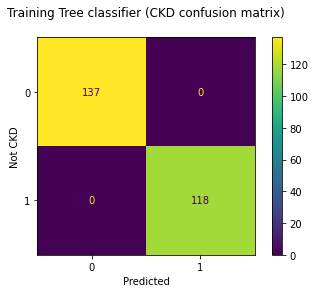

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       118

    accuracy                           1.00       255
   macro avg       1.00      1.00      1.00       255
weighted avg       1.00      1.00      1.00       255



In [35]:
# Training
x = ckd_encoded_df[select_features]
y = ckd_encoded_df[select_target]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(x_train, y_train)

y_estimated = tree_clf.predict(x_train)
cm= confusion_matrix(y_train, y_estimated, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.ylabel('Not CKD')
plt.xlabel('Predicted')
plt.title('Training Tree classifier (CKD confusion matrix)\n')
plt.show()

report = classification_report(y_train, y_estimated)
print(report)

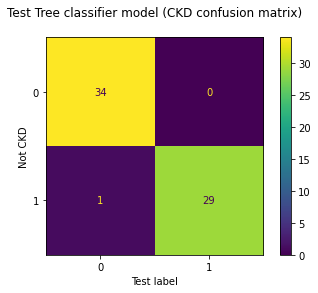

accuracy: 63
recall: [1.         0.96666667]
presicion: [0.97142857 1.        ]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.97      0.98        30

    accuracy                           0.98        64
   macro avg       0.99      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64



In [36]:
# Test
y_estimated = tree_clf.predict(x_test)
cm= confusion_matrix(y_test, y_estimated, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.ylabel('Not CKD')
plt.xlabel('Test label')
plt.title('Test Tree classifier model (CKD confusion matrix)\n')
plt.show()

accuracy=accuracy_score(y_test, y_estimated, normalize=False)
recall=recall_score(y_test, y_estimated,average=None)
presicion=precision_score(y_test, y_estimated,average=None)

print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"presicion: {presicion}")

report = classification_report(y_test, y_estimated)
print(report)

- Estimate the accuracy with Cross-Validation

In [37]:
scores = cross_val_score(tree_clf, x, y, scoring='accuracy', cv=cv)

# report performance
print('Accuracy with cross validation score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy with cross validation score: 0.962 (0.044)


Looking at this test of the decision tree model, we can see that it is not so bad. Because we have F1 with good "accuracy", good "precision" and good "recall" values. However, we have to pay attention when notCKD is 1. Because it means that when the patient has CKD and the prediction says it is healthy, this kind of prediction will be hazardous. 
Fortunately, in this test, we have good predictions. In the future, we have to validad with other data to verify the model.

#### Decision tree plot

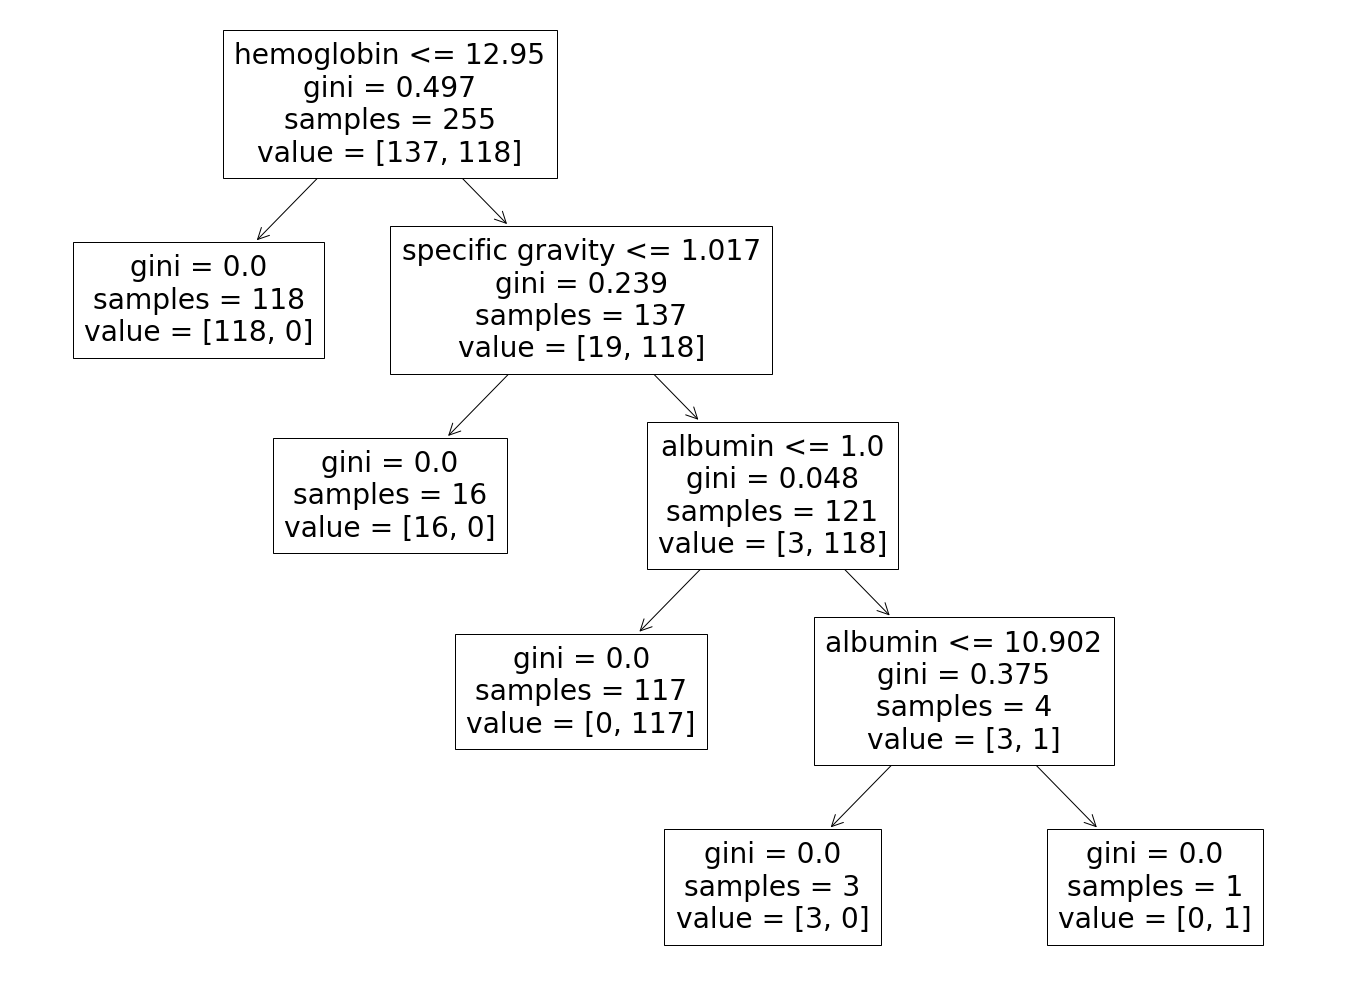

In [38]:
fig = plt.figure(figsize=(24,18))
_ = tree.plot_tree(tree_clf,feature_names=list(x))

This figure is not simple to understand. So, I am going to plot with "dtreeviz".

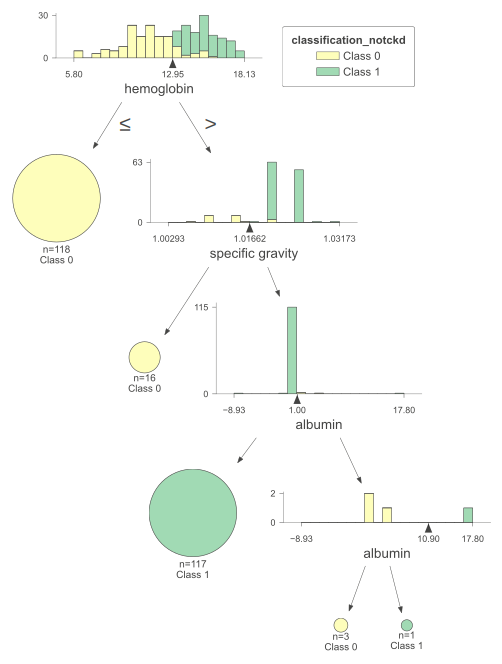

In [39]:
viz = dtreeviz.model(tree_clf,x_train,y_train,target_name=y.name,feature_names=list(x))
viz.view(scale=1.5)

We can see that "packed cell volume" is a relevant feature. Also, "specific gravity" is quiet important after "packed cell volume".

##### Try to use Decision Tree Classifier with best hyperparameters

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(tree_clf, param_grid, scoring='accuracy', cv=cv)

# Fit the model to the data
grid_search.fit(x, y)
print("Best Parameters: ", grid_search.best_params_)

# Get the best model found
best_tree_clf = grid_search.best_estimator_

# Evaluate the best model with cross validation
best_scores = cross_val_score(best_tree_clf, x, y, scoring='accuracy', cv=cv)
print('Best Model Accuracy with Cross Validation: %.3f (%.3f)' % (np.mean(best_scores), np.std(best_scores)))

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Model Accuracy with Cross Validation: 0.987 (0.015)


In [41]:
gs_criterion = grid_search.best_params_['criterion']
gs_max_depth = grid_search.best_params_['max_depth']
gs_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
gs_min_samples_split = grid_search.best_params_['min_samples_split']

# Initialize the decision tree classifier with the best parameters
best_tree_clf = DecisionTreeClassifier( criterion = gs_criterion, 
                                        max_depth = gs_max_depth, 
                                        min_samples_leaf = gs_min_samples_leaf, 
                                        min_samples_split = gs_min_samples_split, 
                                        random_state = 0)

# Entrenar el modelo con los mejores parámetros en todo el conjunto de datos
best_tree_clf.fit(x, y)

# Evaluar el modelo con validación cruzada
best_scores = cross_val_score(best_tree_clf, x, y, scoring='accuracy', cv=cv)
print('Best Model Accuracy with Cross Validation: %.3f (%.3f)' % (np.mean(best_scores), np.std(best_scores)))

Best Model Accuracy with Cross Validation: 0.987 (0.015)


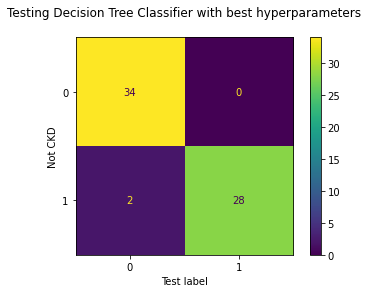

accuracy: 62
recall: [1.         0.93333333]
presicion: [0.94444444 1.        ]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.93      0.97        30

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



In [42]:
# Testing Decision Tree Classifier with best hyperparameters
y_estimated = best_tree_clf.predict(x_test)
cm= confusion_matrix(y_test, y_estimated, labels=best_tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_tree_clf.classes_)
disp.plot()
plt.ylabel('Not CKD')
plt.xlabel('Test label')
plt.title('Testing Decision Tree Classifier with best hyperparameters\n')
plt.show()

accuracy=accuracy_score(y_test, y_estimated, normalize=False)
recall=recall_score(y_test, y_estimated,average=None)
presicion=precision_score(y_test, y_estimated,average=None)

print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"presicion: {presicion}")

report = classification_report(y_test, y_estimated)
print(report)

Using GridSearchCV to obtain the best hyperparameters and applying the Decision Tree Classifier does not improve the first model, or at least it doesn't improve the original model.

#### 8.2 Random Forest Classifier
- Training and Test with random forest classifier

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96875


- Estimate the accuracy with Cross-Validation

In [44]:
scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cv)

# report performance
print('Accuracy with cross validation score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy with cross validation score: 0.991 (0.020)


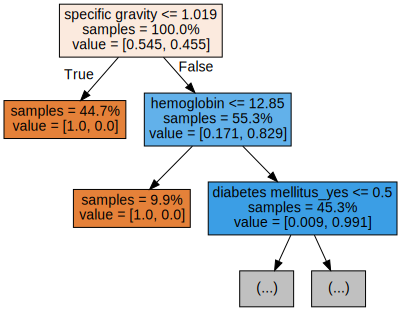

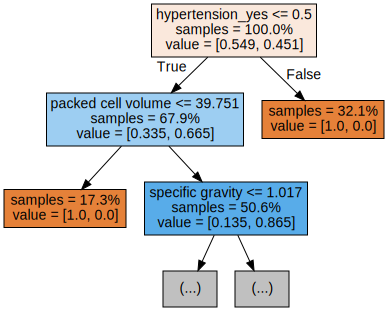

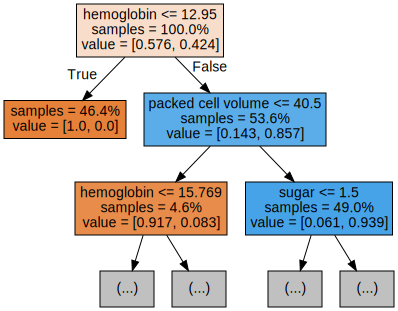

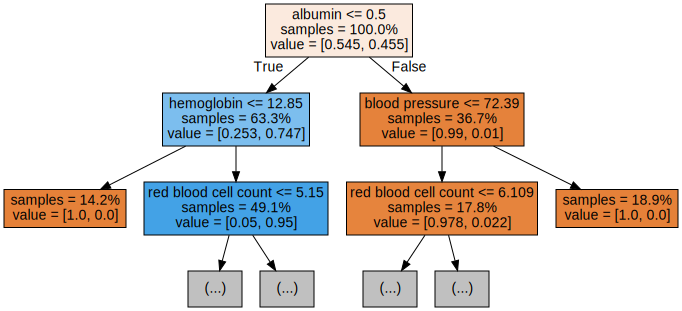

In [45]:
# Export the first three decision trees from the forest
for i in range(4):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                                feature_names=x_train.columns,  
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

##### Hyperparameter Tuning

In [46]:
param_dist = {'n_estimators': randint(50,500),
                'max_depth': randint(1,20)}

# # Create a random forest classifier
# rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                param_distributions = param_dist, 
                                n_iter=5, 
                                cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AD84F0D8B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AD84A43B80>})

In [47]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 327}


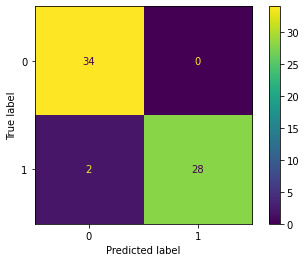

In [48]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

##### 8.3 K-Neighbors Classifier
- Training and Test with Logistic Regression model

In [49]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.921875
Precision: 0.8571428571428571
Recall: 1.0


- Estimate the accuracy with Cross-Validation

In [50]:
scores = cross_val_score(rf, x, y, scoring='accuracy', cv=cv)
# report performance
print('Accuracy with cross validation score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy with cross validation score: 0.991 (0.020)


#### 8.4 Logistic Regression
- Training and Test with Logistic Regression model

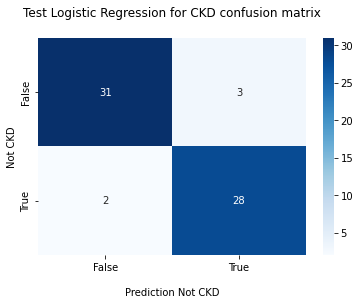

accuracy: 59
recall: [0.91176471 0.93333333]
presicion: [0.93939394 0.90322581]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.90      0.93      0.92        30

    accuracy                           0.92        64
   macro avg       0.92      0.92      0.92        64
weighted avg       0.92      0.92      0.92        64



In [51]:
# Separacion train/tet
model = LogisticRegression(max_iter=10000, n_jobs=-1) 
# Ajustar modelo
model.fit(x_train, y_train) 
#Predicciones
predicciones = model.predict(x_test)

#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Test Logistic Regression for CKD confusion matrix\n');
ax.set_xlabel('\nPrediction Not CKD')
ax.set_ylabel('Not CKD')
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

accuracy_score(y_test, predicciones)
accuracy=accuracy_score(y_test, predicciones, normalize=False)
recall=recall_score(y_test, predicciones,average=None)
presicion=precision_score(y_test, predicciones,average=None)

print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"presicion: {presicion}")

report = classification_report(y_test, predicciones)
print(report)

In this case, the Logistic regression model is better than the tree classification model because it has higher accuracy and precision values.

- Estimate the accuracy with Cross-Validation

In [52]:
# model = LogisticRegression()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.962 (0.031)


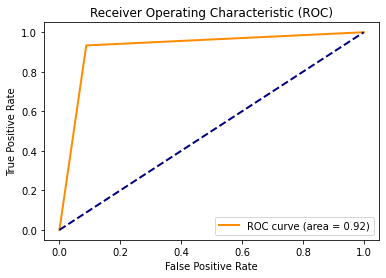

In [53]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicciones)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Draw the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### 9 Unknown classification case

If we had a data set without ACKD results, could we identify or classify this chronic disease?


#### 9.1 PCA

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
unknown_ckd_df = ckd_encoded_df.drop(["classification_notckd"],axis=1)
nro_components = 2

In [56]:
def pca_finder(x,nro_components):
    # Scale the variables
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)  # Scale only selected features

    # Initialize PCA and fit it to the scaled data set
    pca = PCA(n_components=nro_components)  # We want two main components
    principal_components = pca.fit_transform(x_scaled)

    # Obtener las cargas de los dos primeros componentes
    component_loadings = pca.components_

    # Show the loads of the first two components
    print("Loadings of the first two principal components:")
    for i, (component, loadings) in enumerate(zip(component_loadings, pca.explained_variance_ratio_), 1):
        print(f"Principal Component {i} - Explained Variance Ratio: {loadings}")
        print("Loadings:")
        for j, feature in enumerate(select_features):
            print(f"{feature}: {component[j]}")
        print()
    return principal_components, select_features

In [57]:
principal_components, first_pca = pca_finder(unknown_ckd_df, nro_components)
print("First Principal Component:",first_pca)

Loadings of the first two principal components:
Principal Component 1 - Explained Variance Ratio: 0.2672364640448189
Loadings:
hemoglobin: 0.15949483696839103
specific gravity: 0.10723328055973522
hypertension_yes: -0.27094982231208603
packed cell volume: 0.1280725813356256
red blood cells_normal: 0.04686299549539788
red blood cell count: 0.19515764153549023
diabetes mellitus_yes: 0.2268952425629659
albumin: 0.29591325298981763
blood pressure: -0.18043208864578558
age: -0.0023986347772588404
sugar: -0.30876533559391706

Principal Component 2 - Explained Variance Ratio: 0.06397592268300166
Loadings:
hemoglobin: -0.2674612349478943
specific gravity: -0.08544786961149303
hypertension_yes: -0.0013751073965227666
packed cell volume: 0.23427630672865138
red blood cells_normal: -0.2511084041078121
red blood cell count: -0.1943405183098307
diabetes mellitus_yes: 0.0463942750413189
albumin: -0.0031399952688532127
blood pressure: 0.14371584671695461
age: -0.025808099458784848
sugar: -0.100309745

First Principal Components:<br>
Variance Explanation: 0.263 (26.3%)
Relevant Variables with the Highest Loadings:
hypertension_yes: 0.294
diabetes mellitus_yes: -0.276
sodium: 0.227
packed cell volume: 0.196

Second Principal Component:<br>
Variance Explanation: 0.064 (6.4%)
Relevant Variables with the Highest Loadings:
red blood cell count: 0.270
hemoglobin: -0.287
packed cell volume: -0.196

Higher loadings in absolute value indicate a greater influence of that variable on the direction and representation of the corresponding component. In the First Principal Component, it appears that the presence of hypertension (hypertension_yes), sodium (sodium), and packed cell volume (packed cell volume) are strongly associated, while the presence of diabetes (diabetes mellitus_yes) has an inverse association with this component.

In the Second Principal Component, the number of red blood cells (red blood cell count) and the amount of hemoglobin (hemoglobin) have a significant influence in opposite directions, along with the packed cell volume, which is also inversely influenced. associated.

These results suggest the variables that contribute most to these specific components and how they relate to each other in terms of their influence on the principal components.

#### 9.2 K-Means

In [58]:
from sklearn.cluster import KMeans

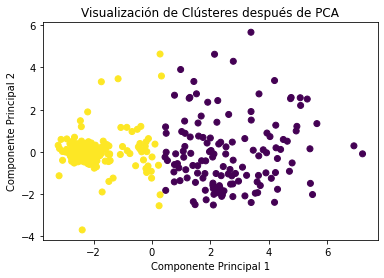

In [59]:
# Aplicar KMeans con 2 clústeres a los datos transformados por PCA
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Visualizar los clústeres (en caso de tener solo dos dimensiones)
if principal_components.shape[1] == 2:
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('Visualización de Clústeres después de PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()

#### 9.3 DBSCAN

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
# Escalar los datos
scaler = StandardScaler()
unknown_scaled = scaler.fit_transform(unknown_ckd_df)

# Definir el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta los parámetros eps y min_samples según tu caso

# Aplicar DBSCAN a los componentes principales
clusters = dbscan.fit_predict(principal_components)

# Obtener el número de clusters encontrados por DBSCAN (ignorando el ruido, es decir, aquellos puntos marcados como -1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# Imprimir el número de clusters y la asignación de puntos a cada cluster
print(f"Número de clusters encontrados: {num_clusters}")
print(f"Asignación de puntos a cada cluster:\n{clusters}")

Número de clusters encontrados: 4
Asignación de puntos a cada cluster:
[ 0  0  0  0  0 -1 -1 -1 -1 -1  0  1  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  0
  0  2  0  0  1  0  0  0  0  0  0  0  0  2  1  1  0 -1  0 -1  0  0  0  0
  0 -1 -1  0  3  0  0  0  0  0  0  0  0  1  0  0  0  0  2 -1  0  0  0  0
 -1 -1  0  0  0  3  0  0 -1  0 -1  0  0  0  0  0 -1  0  0  0 -1  0  0  0
  0 -1  0 -1  0  0  0  2  0  3  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0 -1 -1 -1 -1  0 -1  3  3  0 -1 -1 -1  0  0 -1  0  0  0  1  0  0
  1  0  2  0 -1  0  0  0  0  0  0  1 -1 -1  0 -1  0  0  1  0  0  0 -1  0
  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

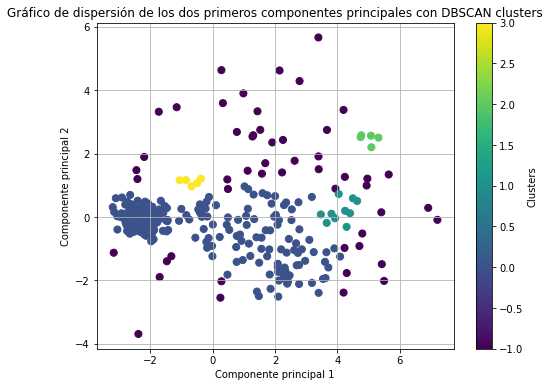

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Gráfico de dispersión de los dos primeros componentes principales con DBSCAN clusters')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Clusters')
plt.grid(True)
plt.show()

### 10. Estimate Glomerular Filtration Rate Analysis by regression
In this subsection we are going to try to find out the function that define when CKD patient needs to do dialisys. Hence, "lineal regression" will be our model to predict the time. 
Before working on the model, we have to understand what is the feature that make indication to do dialisys. According to [The Glomerular Filtration Rate: From the Diagnosis of Kidney Function to a Public Health Tool][1] we can compute eGFR (estimate Glomerular Filtration Rate) and try to farther if it needs dialisys or not.
In general, and despite an apparent stable clinical situation, dialysis should be started when renal function is between 8-12% of eGFR.

| Model name | Equation |
|------------|----------|
|**Cockcroft-Gault equation**| Creatinine Clearance = 140−age (years) x weight (kg)72 x serum creatinine (mg/dl) x 0.85 (if female)|
|**MDRD-4 (simplified)**| Estimated Glomerular Filtration Rate (mL/min/1.73 m2) = 175 (Serum Creatinine in mg/dl × 0.011312)−1.154 × (age in years )−0.203 × (0.742 if female) × (1.212 if African American/black)|
|**CKD-EPI (2009)**|Estimated GFR = 141 x min(SCr/κ, 1)α x max(SCr /κ, 1)−1.209 x 0.993Age x 1.018 [if female] x 1.159 [if Black]<br /> SCr (standardized serum creatinine) = mg/dL.,<br /> K = 0.7 (females) or 0.9 (males),<br /> α = −1.329 (female) or−0.411 (male),<br /> Min = indicates the minimum of SCr/K or 1,<br /> max = indicates the maximum of SCr/K or 1,<br /> Age = Years|
|**FAS (2016)**| 1) Estimated GFR = 107.3/(SCr/ Q) for age ≤ 2 to ≤ 40 years <br /> 2) Estimated GFR = 107.3/(Scr/ Q) x 0.988 (age−40) for age > 40 years <br /> Q: the mean or median SCr value for age/sex-specific healthy populations|
|**CKD-EPI cystatin C equation**| Estimated Glomerular Filtration Rate (mL/min/1.73 m2) == 133 × min(Scys/0.8, 1)−0.499 × max (Scys/0.8, 1)−1.328 × 0.996Age [ × 0.932 if female ] <br /> Scys = serum cystatin C,<br /> min indicates the minimum of Scr/κ or 1,<br /> and max indicates the maximum of Scys/κ or 1 |
|**CKD-EPI creatinine-cystatin C**| Estimated Glomerular Filtration Rate (mL/min/1.73 m2) =135 × min(Scr/κ, 1)α × max(Scr/κ, 1)−0.601 × min(Scys/0.8, 1)−0.375 × max(Scys/0.8, 1)−0.711 ×0.995Age [ ×0.969 if female] [ ×1.08 if black] <br /> Scr = serum creatinine,<br /> Scys = serum cystatin C,<br /> κ is 0.7 for females and 0.9 for males,<br /> α is −0.248 for females and −0.207 for males, min indicates the minimum of Scr/κ or 1,<br /> and max indicates the maximum of Scr/κ or 1.|

[Tabla reference][2]

[1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8675900/
[2]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8675900/table/T1/?report=objectonly

It is possible to observe in the table that at least we need "Serum Creatinine" as a base feature to calculate the eGFR. Hence, we are going to study Regression model with the target of "Serum Creatinine" base on best feature selection.

Text(0.5, 1.0, 'Creatinine per age')

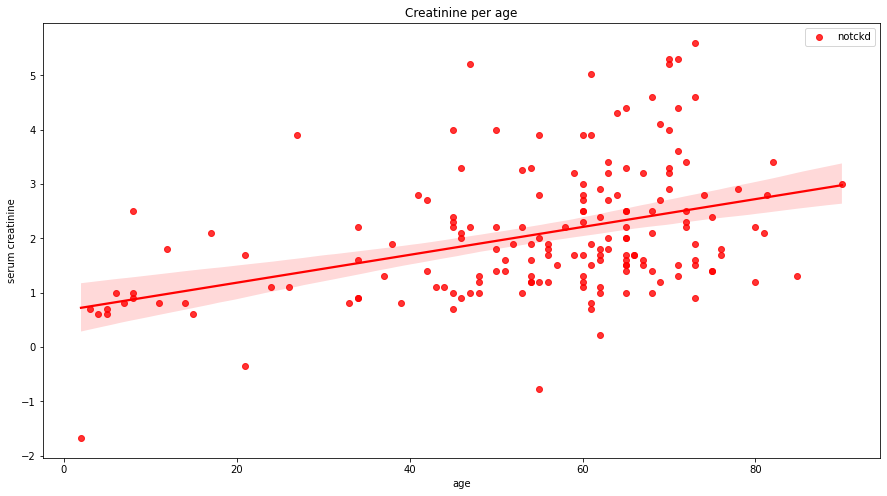

In [63]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),facecolor = 'white')
ax = sns.regplot(x="age", y="serum creatinine", 
                    ax=ax,color='r',marker='o',
                    data=ckd_encoded_df[ckd_encoded_df['classification_notckd']==0],label=value)
ax.legend(loc='best') 
ax.set_title("Creatinine per age")

As shown in the last figure, we can understand that with this data base we can not predict a good result. So, we are going to take a real case of Serum creatinine. 

With a real case we will try to find out the function.

##### Take a real creatinina data of a patient

Let's take my mother's creatinine data. She is a CKD patient. Therefore, we are going to use her records. And we are going to investigate and predict the kidney function curve with creatinine values.

In [64]:
ckd_creatinina_real_df = pd.read_csv('creatinina_real.csv', index_col=False)

# ckd_creatinina_real_df['Fecha'] = pd.to_datetime(ckd_creatinina_real_df['Fecha'])
ckd_creatinina_real_df.sort_values(by=['Fecha', 'Valor[mg/dL]'], inplace = True)

ckd_creatinina_real_df.info()
ckd_creatinina_real_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 37 to 0
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fecha         38 non-null     int64  
 1   Valor[mg/dL]  38 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 912.0 bytes


,Fecha,Valor[mg/dL]
37,20120704,0.90
36,20140214,1.12
35,20141121,1.24
34,20150130,1.10
33,20170724,1.03


In [65]:
x = ckd_creatinina_real_df[['Fecha']]
y = ckd_creatinina_real_df['Valor[mg/dL]']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

x_train = pd.to_datetime(x_train['Fecha'], format='%Y%m%d').apply(lambda x: x.value).to_list()
y_train = y_train.to_list()

x_test = pd.to_datetime(x_test['Fecha'], format='%Y%m%d').apply(lambda x: x.value).to_list()
y_test = y_test.to_list()

##### 10.1 Regression model metrics

Before we are going to create regression models, we are going to define a function to compute the metrics for evaluate the performance of regression models.

In [66]:
## To evaluate the performance of regression models

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error

def measurements_regression(y_original, y_pred, polynomial_degree):
    # Mean Squared Error
    mse = mean_squared_error(y_original, y_pred)
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    # Mean Absolute Error
    mae = mean_absolute_error(y_original, y_pred)
    # Mean Absolute Percentage Error
    mape = np.mean(np.abs((y_original - y_pred) / y_original)) * 100
    # Relative_Absolute_Error
    Relative_Absolute_Error  = np.sum(np.abs(y_original-y_pred))/np.sum(np.abs(y_original-np.mean(y_original)))
    # R2 score
    r2 = r2_score(y_original, y_pred)

    ## Calcular R² ajustado
    # Number of observations
    n = len(y_original)
    # Number of predictors (in this case, the degree of the polynomial)
    k = polynomial_degree
    # R² ajustado
    r2_ajustado = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    # Median Absolute Error
    medae = median_absolute_error(y_original, y_pred)

    # Maximum Error
    max_err = max_error(y_original, y_pred)

    # Print results
    # print(f"Mean Squared Error (MSE): \t\t {round(mse,2)}")
    # print(f"Root Mean Squared Error (RMSE): \t {round(rmse,2)}")
    # print(f"Mean Absolute Error (MAE): \t\t {round(mae,2)}")
    # print(f"Mean Absolute Percentage Error (MAPE): \t {round(mape,2)}%")
    # print(f"Relative_Absolute_Error (RAE): \t\t {round(Relative_Absolute_Error,2)}")
    # print(f"Determination Coefficient (R²): \t {round(r2,2)}")
    # print(f"R² Adjusted: \t\t\t\t {round(r2_ajustado,2)}")
    # print(f"Median Absolute Error (MedAE):\t\t {round(medae,2)}")
    # print(f"Maximum Error: \t\t\t\t {round(max_err,2)}")

    return {"mse": round(mse,2), 
            "rmse": round(rmse,2), 
            "mae": round(mae,2), 
            "mape [%]": round(mape,2),
            "Relative_Absolute_Erro": round(Relative_Absolute_Error,2),
            "r2": round(r2,2),
            "r2_ajustad": round(r2_ajustado,2),
            "medae": round(medae,2),
            "max_err": round(max_err,2)}

##### 10.2 Polynomial function

First, let's try to achieve our polynomial function through our intuition. That is, without using machine learning models

In [67]:
modelo = np.poly1d (np.polyfit (x_train, y_train, 3))

start = pd.to_datetime(min(x_train))
# end = pd.to_datetime(max(x_train))
end = pd.to_datetime(max(x_train))+pd.DateOffset(days=365*3)
ckd_creatinina_min = ckd_creatinina_real_df['Valor[mg/dL]'].min()
ckd_creatinina_max = ckd_creatinina_real_df['Valor[mg/dL]'].max()

poliline = np.linspace(start.value, end.value, 50)
polynomial_degree = 2
# Calculate test model
metric_results = measurements_regression(y_test, modelo(x_test),polynomial_degree)
metrics_df = pd.DataFrame([metric_results],index=["poly1d"])


In [68]:
patient_age_cg = 71
patient_weight_cg = 48
patient_creatinine_cg = 3.3
Cockcroft_Gault = (140 - patient_age_cg) * (patient_weight_cg) * (0.85) / (72 *patient_creatinine_cg)

Cockcroft_Gault_dialysis_min = 8
Cockcroft_Gault_dialysis_max = 12
patient_creatinine_cg_min = (140 - patient_age_cg) * (patient_weight_cg) * (0.85) / (72 * Cockcroft_Gault_dialysis_max)
patient_creatinine_cg_max = (140 - patient_age_cg) * (patient_weight_cg) * (0.85) / (72 * Cockcroft_Gault_dialysis_min)

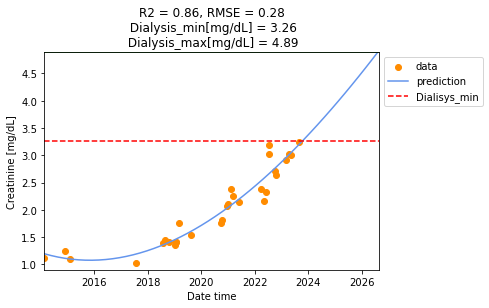

In [69]:
# Plot data
plt.scatter(pd.to_datetime(x_train).to_list(), y_train, color='darkorange',label='data')

# Plot model
t = pd.to_datetime(poliline)
x_modelo = t.to_list()
plt.plot (x_modelo, modelo(poliline), color='cornflowerblue',label='prediction')

plt.axhline(y = patient_creatinine_cg_min, color = 'r', linestyle = 'dashed', label = "Dialisys_min")
plt.axhline(y = patient_creatinine_cg_max, color = 'g', linestyle = '-')

plt.ylim(ckd_creatinina_min, patient_creatinine_cg_max)
plt.xlim(start,end)
plt.xlabel('Date time')
plt.ylabel('Creatinine [mg/dL]')
plt.title(  'R2 = ' + str(np.round(metric_results['r2'],3))+
            ', RMSE = '+str(np.round(metric_results['rmse'],3))+
            '\n Dialysis_min[mg/dL] = '+str(round(patient_creatinine_cg_min,2))+'\n Dialysis_max[mg/dL] = '+str(round(patient_creatinine_cg_max,2)))

plt.legend(bbox_to_anchor = (1.0, 1))
plt.show ()

In [70]:
def days2date(value):
    year = int(value/365)
    month = 0
    if value - year*365 > 30:
        month = int((value - year*365)/30)
    day = 0
    if value - (year*365 + month*30) > 0:
        day = int(value - (year*365 + month*30))

    return f"{year} years, {month} months, {day} days"

In [71]:
x_modelo_up_dialysis = np.array(x_modelo)[modelo(poliline) > patient_creatinine_cg_min]
x_modelo_down_dialysis = np.array(x_modelo)[modelo(poliline) < patient_creatinine_cg_max]

delta_time = x_modelo_down_dialysis[-1] - x_modelo_up_dialysis[0]
print("It is predicted that when the CKD patient need dialysis, the delta time to undergo dialysis will be ",days2date(delta_time.days),"If the patient let this delta time pass, the kidney will be in terminal situation")

terminal_time = x_modelo_down_dialysis[-1] - pd.Timestamp.today()
print("It is predicted that you have",days2date(terminal_time.days),"to be in terminal situation of kidney.")


It is predicted that when the CKD patient need dialysis, the delta time to undergo dialysis will be  2 years, 6 months, 22 days If the patient let this delta time pass, the kidney will be in terminal situation
It is predicted that you have 2 years, 6 months, 4 days to be in terminal situation of kidney.


##### 10.3 Polynomial Regression model

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

ckd_creatinina_real_df = pd.read_csv('creatinina_real.csv')

In [73]:
x_creatinina = ckd_creatinina_real_df[['Fecha']]
y_creatinina = ckd_creatinina_real_df['Valor[mg/dL]']

# Generate polynomial features of degree 2
polynomial_degree = 2
poly = PolynomialFeatures(degree=polynomial_degree)
X_poly = poly.fit_transform(x_creatinina)

# Create a linear regression model
modelo = LinearRegression()

# Fit the model to the transformed data
modelo.fit(X_poly, y_creatinina)

# Make predictions using the model
y_pred = modelo.predict(X_poly)

# Arrange the points to graph the curve
orden = np.argsort(x_creatinina.values.flatten())
X_sorted = x_creatinina.values[orden]
y_pred_sorted = y_pred[orden]

In [74]:
# Calculate metrics
metric_results = measurements_regression(y_creatinina,y_pred,polynomial_degree)
metrics_df = metrics_df.append(pd.DataFrame([metric_results],index=["PolynomialFeatures"]))

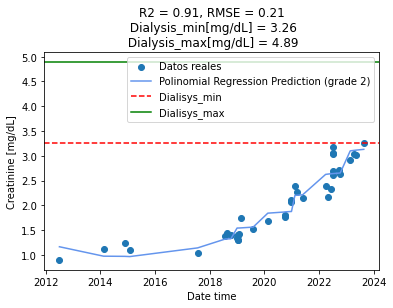

In [75]:
# Plot
x_creatinina_date = pd.to_datetime(x_creatinina['Fecha'], format='%Y%m%d').to_list()
X_sorted_date = pd.to_datetime(pd.DataFrame(X_sorted.tolist())[0], format='%Y%m%d').to_list()

plt.scatter(x_creatinina_date, y_creatinina, label='Datos reales')
plt.plot(X_sorted_date, y_pred_sorted, color='cornflowerblue', label='Polinomial Regression Prediction (grade ' + str(polynomial_degree) + ')')
# plt.scatter(x_creatinina['Fecha'], y_creatinina, label='Datos reales')
# plt.plot(X_sorted, y_pred_sorted, color='cornflowerblue', label='Polinomial Regression Prediction (grade ' + str(polynomial_degree) + ')')
plt.axhline(y = patient_creatinine_cg_min, color = 'r', linestyle = 'dashed', label = "Dialisys_min")
plt.axhline(y = patient_creatinine_cg_max, color = 'g', linestyle = '-', label = "Dialisys_max")
# plt.ylim(ckd_creatinina_min, patient_creatinine_cg_max)
# plt.xlim(start,end)
plt.xlabel('Date time')
plt.ylabel('Creatinine [mg/dL]')
# plt.title('R2 = ' + str(np.round(r2,3))+', RMSE = '+str(np.round(RMSE,3))+
#             '\n Dialysis_min[mg/dL] = '+str(round(patient_creatinine_cg_min,2))+'\n Dialysis_max[mg/dL] = '+str(round(patient_creatinine_cg_max,2)))
plt.title(  'R2 = ' + str(np.round(metric_results['r2'],3))+
            ', RMSE = '+str(np.round(metric_results['rmse'],3))+
            '\n Dialysis_min[mg/dL] = '+str(round(patient_creatinine_cg_min,2))+'\n Dialysis_max[mg/dL] = '+str(round(patient_creatinine_cg_max,2)))

plt.legend(bbox_to_anchor = (1.0, 1))
plt.legend()
plt.show()

##### 10.4 Desicion tree regressor model

In [76]:
x_creatinina = ckd_creatinina_real_df[['Fecha']]
y_creatinina = ckd_creatinina_real_df['Valor[mg/dL]']

orden = np.argsort(x_creatinina.values.flatten())
X_sorted = x_creatinina.values[orden]
y_pred_sorted = y_pred[orden]

In [77]:
from sklearn.tree import DecisionTreeRegressor

x_creatinina = ckd_creatinina_real_df[['Fecha']]
y_creatinina = ckd_creatinina_real_df['Valor[mg/dL]']

# Convert dates to a suitable format
# x_creatinina['Fecha'] = pd.to_datetime(x_creatinina['Fecha'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_creatinina, y_creatinina, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
modelo_dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
modelo_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = modelo_dt.predict(X_test)

In [78]:
metric_results = measurements_regression(y_test, y_pred_dt, polynomial_degree)
metrics_df = metrics_df.append(pd.DataFrame([metric_results],index=["DecisionTreeRegressor"]))

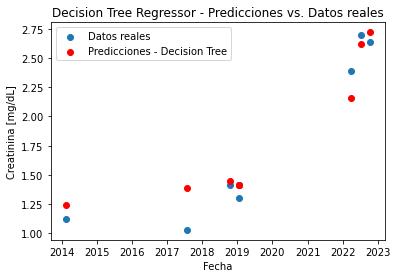

In [79]:
# Plot
X_test_date = pd.to_datetime(X_test['Fecha'], format='%Y%m%d').to_list()

plt.scatter(X_test_date, y_test, label='Datos reales')
plt.scatter(X_test_date, y_pred_dt, color='red', label='Predicciones - Decision Tree')
plt.xlabel('Fecha')
plt.ylabel('Creatinina [mg/dL]')
plt.title('Decision Tree Regressor - Predicciones vs. Datos reales')
plt.legend()
plt.show()

##### 10.5 Random Forest Regressor model

In [80]:
from sklearn.ensemble import RandomForestRegressor

x_creatinina = ckd_creatinina_real_df[['Fecha']]
y_creatinina = ckd_creatinina_real_df['Valor[mg/dL]']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_creatinina, y_creatinina, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
modelo_rf = RandomForestRegressor(random_state=42)

# Fit the model to the training data
modelo_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = modelo_rf.predict(X_test)

In [81]:
# Calculate metrics
metric_results = measurements_regression(y_test, y_pred_rf, polynomial_degree)
metrics_df = metrics_df.append(pd.DataFrame([metric_results],index=["RandomForestRegressor"]))

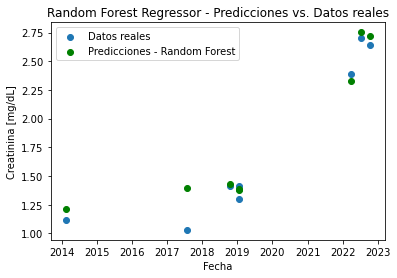

In [82]:
# Plot
X_test_date = pd.to_datetime(X_test['Fecha'], format='%Y%m%d').to_list()

plt.scatter(X_test_date, y_test, label='Datos reales')
plt.scatter(X_test_date, y_pred_rf, color='green', label='Predicciones - Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Creatinina [mg/dL]')
plt.title('Random Forest Regressor - Predicciones vs. Datos reales')
plt.legend()
plt.show()

##### 10.6 Resume

In [83]:
metrics_df

,mse,rmse,mae,mape [%],Relative_Absolute_Erro,r2,r2_ajustad,medae,max_err
poly1d,0.08,0.28,0.19,14.82,0.28,0.86,0.80,0.11,0.64
PolynomialFeatures,0.04,0.21,0.17,9.53,0.28,0.91,0.90,0.13,0.54
DecisionTreeRegressor,0.03,0.17,0.13,9.07,0.21,0.94,0.91,0.09,0.36
RandomForestRegressor,0.02,0.14,0.10,7.67,0.16,0.95,0.93,0.07,0.37


**Mean Squared Error (MSE):** MSE is the average of the squared differences between predictions and actual values.

**Root Mean Squared Error (RMSE):** RMSE is the square root of MSE and provides a measure of the spread of errors.

**Mean Absolute Percentage Error (MAPE):** MAPE measures the average percentage error between predictions and actual values.

**Relative Absolute Error (RAE):** RAE is a metric that measures the relative absolute error between predictions and actual values.

**Determination Coefficient (R²):** The coefficient of determination, or R², measures the proportion of variance in the dependent variable that is predictable from the independent variable.

**Adjusted R²:** Adjusted R² takes into account the number of predictors in the model, adjusting R² to penalize the use of additional predictors.

**Median Absolute Error (MedAE):** MedAE is the median of the absolute differences between predictions and actual values.

**Maximum Error:** Maximum Error measures the absolute value of the largest error between predictions and actual values.


Looking at the last table, we can understand that the model that best fits is the Random Forest Regressor.

### 11. Interpretation and summary

First of all, we tried to understand the context of this research, Chronic Kidney Disease (CKD). Then, we browsed the internet to figure out the dataset of this topic. However, we could not find a big dataset as we had wanted. Because data of this topic has personal data confidentiality, and it is not possible to get it if we do not have agreement of the patients and the hospital or laboratory permissions. The only dataset that we found was a small open-source dataset.<br />
Fortunately, with this dataset, we would study this issue as well as possible and get some promising results. In order to achieve this, first, we explore the dataset to clean, transform, preprocess, etc to improve these data and get the most successful results. Then we observe which features have good correlation between data by heatmap. Also we search which features are the best option to apply in the algorithm development. When we tried to tackle the most suitable algorithm for learning to predict CKD, we realized that the best model was the decision tree classification. To do this, we took 80% of data and the rest of data for validation. This job gives us an approx. 99% accuracy to predict whether a patient would or would not have CKD.<br />
Collecting accurate and ethical health data presents a multitude of challenges, limitations and bias’. We must do our best to be aware of these confounding factors, whilst also acknowledging that there will always be unconscious bias’s we are oblivious to. The first would be to consider that the data was sourced from unknown hospitals and it is apparent that certain demographics (through lifestyle factors, genetics, access to healthcare, cultural stigma, socio-economic status, etc) may have higher rates than others. Secondly, we would need to be aware of the time of day the blood/urine tests were collected, as they can be impacted whether someone has just eaten or drank, additionally there may have been festivals happening during the data collection period where people usually consume more. Thirdly, there may have been a bias from participants either opting in or out of having their data collected. Lastly, is the potential for human error/equipment error in obtaining and transcribing the results. These confounding factors listed above are only the tip of the iceberg, we did not even mention whether there may have been a pandemic/endemic taking place during the time of data collection (i.e., which would have distorted the white blood cell count).<br />
Another last work that we attempted was the deadtime to do dialysis. To tackle this issue, we studied the estimated Glomerular Filtration Rate (eGFR) and found creatinine data of a particular patient. Then, we researched the model to learn the function of creatinine on date. The model to resolve this was by polynomial model (we tried to apply a regression model, but it could not resolve as we expected).

### 11. Conclusion

We were able to predict with 99% accuracy whether an individual has CKD or not. It is clear that CKD is a challenging health burden for individuals, families and governments. With the help of accurate and ethical, large scale data collection, machine learning can be utilised as an important tool to tackle this problem. This would help to improve the longevity and quality of life of many people around the world and reduce the health burden cost for governments.